## 1. Exploração Inicial dos Dados

1. Carregue a base "desafio6_lixo_eletronico.csv" em um DataFrame do Pandas
2. Faça uma análise exploratória (shape, tipos de variáveis, estatísticas descritivas) 
3. Apresente o total de valores ausentes e duplicados
   
### 1.1 Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

color = sns.color_palette('RdBu_r')

# Leitura dos dados
# Inserção de tratamento de exceção para controle de erros
try:
    path = '/home/akel/PycharmProjects/I2A2/data/raw/'
    file = 'desafio6_lixo_eletronico.csv'
    dfo = pd.read_csv(path + file)
    print("✅ Arquivo carregado com sucesso!")

except FileNotFoundError:
    print("❌ Erro: Arquivo não encontrado. Verifique o caminho e tente novamente.")
except pd.errors.EmptyDataError:
    print("❌ Erro: O arquivo está vazio.")
except pd.errors.ParserError:
    print("❌ Erro: Problema ao analisar o arquivo CSV. Verifique o formato.")
except Exception as e:
    print(f"❌ Erro inesperado ao carregar o arquivo: {e}")
dfo.head(3)

✅ Arquivo carregado com sucesso!


,ID_Registro,Tipo_Eletronico,Ano_Fabricacao,Origem,Destino_Final,Peso_kg,Nivel_Toxico,Custo_Reciclagem_R$,Municipio,Educacao_Ambiental,Data_Descarte
0,1,Impressora,2006,Urbana,Aterro Controlado,30.95,Alto,122.38,Marabá,Não,2022-09-02 11:26:10.469798656
1,2,Bateria,2002,Urbana,Aterro Controlado,16.89,Alto,48.65,Novo Progresso,Sim,2023-03-03 01:17:18.926174496
2,3,Geladeira,2016,Governamental,Cooperativa,32.82,Baixo,165.25,Tucuruí,Sim,2021-08-09 09:10:52.348993280


### 1.2 Analise exploratoria 

In [2]:
# renomear coluna Custo_Reciclagem_R$
dfo = dfo.rename(columns={'Custo_Reciclagem_R$': 'Custo_Reciclagem'})


df = dfo.copy()
print("=" * 50)
print("ANÁLISE EXPLORATÓRIA DO DATAFRAME")
print("=" * 50)
# Informações sobre o shape dos dados
print(f"\n📊 DIMENSÕES: {df.shape[0]} linhas × {df.shape[1]} colunas")

# Informações sobre tipos de dados
print(f"\n🔧 TIPOS DE DADOS:")
print(df.dtypes.to_frame('Tipo').to_markdown())

# Estatísticas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])
if not numericas.empty:
    # Obter estatísticas descritivas
    descricao = numericas.describe()
    
    # Adicionar linha de valores nulos
    valores_nulos = numericas.isnull().sum()
    descricao.loc['null'] = valores_nulos
    print(f"\n📈 ESTATÍSTICAS NUMÉRICAS:")

    print(descricao.to_markdown())
else:
    print("❌ Nenhuma variável numérica encontrada")


colunas_categoricas = [
    'Tipo_Eletronico', 
    'Origem', 
    'Destino_Final', 
    'Nivel_Toxico', 
    'Educacao_Ambiental'
]

# Estatísticas categórica
print(f"\n📊 ESTATÍSTICAS CATEGÓRICAS:")
resumo_categoricas = []
for coluna in colunas_categoricas:
    num_unicos = df[coluna].nunique()
    valores = df[coluna].value_counts().head(3)
    top_valores = ", ".join([f"{k} ({v})" for k, v in valores.items()])    
    resumo_categoricas.append({
        'Variável': coluna,
        'Valores Únicos': num_unicos,
        'Top 3 Valores': top_valores,
        'Valores Nulos': df[coluna].isnull().sum()
    })
resumo_df = pd.DataFrame(resumo_categoricas)
print(resumo_df.to_markdown(index=False))
print('\n')

# Contagem de Duplicatas
duplicatas_ID = df['ID_Registro'].duplicated().sum()
print("=" * 50)
print("🔍 VERIFICAÇÃO DE DUPLICATAS")
print(f"Total registros ID duplicados: {duplicatas_ID}")
duplicatas = df.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicatas}")
print("=" * 50)

print('\n')

# Contagem de Nulos
print("🔍 VERIFICAÇÃO DE VALORES NULOS:")
print(f"Total de valores nulos: {df.isnull().sum().sum()}")
print("=" * 50)
print("  NULOS POR COLUNA:")
print("=" * 50)
nulos_por_coluna = df.isnull().sum()
# nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]  # Mostra apenas colunas com nulos

# if len(nulos_por_coluna) > 0:
print(nulos_por_coluna.to_frame('Quantidade de Nulos').to_markdown())
print("=" * 50)
print("=" * 50)

ANÁLISE EXPLORATÓRIA DO DATAFRAME

📊 DIMENSÕES: 150 linhas × 11 colunas

🔧 TIPOS DE DADOS:
|                    | Tipo    |
|:-------------------|:--------|
| ID_Registro        | int64   |
| Tipo_Eletronico    | object  |
| Ano_Fabricacao     | int64   |
| Origem             | object  |
| Destino_Final      | object  |
| Peso_kg            | float64 |
| Nivel_Toxico       | object  |
| Custo_Reciclagem   | float64 |
| Municipio          | object  |
| Educacao_Ambiental | object  |
| Data_Descarte      | object  |

📈 ESTATÍSTICAS NUMÉRICAS:
|       |   ID_Registro |   Ano_Fabricacao |   Peso_kg |   Custo_Reciclagem |
|:------|--------------:|-----------------:|----------:|-------------------:|
| count |      150      |        150       |  135      |           135      |
| mean  |       72.7333 |       2008.65    |   25.5156 |           103.103  |
| std   |       43.1634 |          8.83338 |   13.9163 |            56.2429 |
| min   |        1      |       1995       |    1.71   |       

### Comentários
1. **Origem:** 33% Governamental, contra 25% Urbana e 21% Industrial (válidos). O setor público tem papel central na geração de lixo eletrônico. Isso abre espaço para políticas públicas direcionadas: programas de descarte correto nas repartições podem ter impacto direto e rápido.  

2. **Nível Tóxico:** está bem distribuído (27% Alto, 27% Baixo, 26% Médio, 20% da 4ª categoria). Ou seja, não há predominância clara de resíduos “inofensivos”: grande parte dos descartes tem risco ambiental significativo, reforçando a urgência de medidas preventivas.  


## 2. Limpeza e Padronização
1. Identifique e trate valores inconsistentes (ex.: "reciclagem formal" e "Reciclagem Formal")
2. Corrija erros de digitação e padronize todas as colunas categóricas.
3. Elimine duplicatas mantendo apenas registros válidos.

### a) Variaveis Categóricas
* As variaveis foram convertidades para minusculas;
* A designação **'NaN'** foi substituido por **"Desconhecido"** a fim de preservar a informação;
* O Valor especifico **urbana** for trocado por **urbano**

In [3]:
# Padronização de variáveis categóricas
colunas_categoricas = [
    'Tipo_Eletronico', 
    'Origem', 
    'Destino_Final', 
    'Nivel_Toxico', 
    'Educacao_Ambiental'
]

# Converter todas as colunas para minúsculas
for coluna in colunas_categoricas:
    df[coluna] = df[coluna].str.lower()
    
# Transformando valores nulos e desconhecido
for coluna in colunas_categoricas[:3]:  
    df[coluna] = df[coluna].fillna("desconhecido")

# Correção de valores específicos
df['Origem'] = df['Origem'].replace({'urbana': 'urbano'})

print(f"\n{'=' * 80}")
print("📊 VALORES ÚNICOS APÓS PADRONIZAÇÃO")
print(f"{'=' * 80}")

for coluna in colunas_categoricas:
    print(f"\n🎯 {coluna}:")
    print(f"   Valores únicos: {df[coluna].nunique()}")
    print(f"   Valores: {df[coluna].unique()}")


📊 VALORES ÚNICOS APÓS PADRONIZAÇÃO

🎯 Tipo_Eletronico:
   Valores únicos: 8
   Valores: ['impressora' 'bateria' 'geladeira' 'tv' 'desconhecido' 'computador'
 'celular' 'tablet']

🎯 Origem:
   Valores únicos: 5
   Valores: ['urbano' 'governamental' 'industrial' 'rural' 'desconhecido']

🎯 Destino_Final:
   Valores únicos: 6
   Valores: ['aterro controlado' 'cooperativa' 'reciclagem formal' 'lixão'
 'desconhecido' 'rio']

🎯 Nivel_Toxico:
   Valores únicos: 4
   Valores: ['alto' 'baixo' 'médio' 'crítico']

🎯 Educacao_Ambiental:
   Valores únicos: 2
   Valores: ['não' 'sim']


### b) Variaveis Númericas
Para as variaveis **númericas** (***Peso_kg*** e ***Custo_Reciclagem***) avaliamos as estatisticas descritivas e notamos que média e médiana são muito proximos, indicando dados quase simétricos. Desta forma, uma abordagem simples e direta é a **atribuição da mediana para os dados NaN**, por garantir a preservação dos dados e ser menos sensivel a outliers que a média.

In [4]:
# Variáveis Numéricas
colunas_numericas = ['Peso_kg', 'Custo_Reciclagem']
for coluna in colunas_numericas:
    df[coluna] = df[coluna].fillna(df[coluna].median())

# Estatísticas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])
descricao = numericas.describe()
print(f"\n📈 ESTATÍSTICAS NUMÉRICAS 2:")
print(descricao.to_markdown())

# Detalhamento de nulos por coluna
print("=" * 50)
print("  NULOS POR COLUNA:")
print("=" * 50)
nulos_por_coluna = df.isnull().sum()
# nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]  # Mostra apenas colunas com nulos

# if len(nulos_por_coluna) > 0:
print(nulos_por_coluna.to_frame('Quantidade de Nulos').to_markdown())



📈 ESTATÍSTICAS NUMÉRICAS 2:
|       |   ID_Registro |   Ano_Fabricacao |   Peso_kg |   Custo_Reciclagem |
|:------|--------------:|-----------------:|----------:|-------------------:|
| count |      150      |        150       |  150      |           150      |
| mean  |       72.7333 |       2008.65    |   25.382  |           103.663  |
| std   |       43.1634 |          8.83338 |   13.2033 |            53.3635 |
| min   |        1      |       1995       |    1.71   |             5.51   |
| 25%   |       36.25   |       2000.25    |   16.295  |            68.125  |
| 50%   |       70.5    |       2009       |   24.18   |           108.71   |
| 75%   |      109.75   |       2017       |   35.31   |           145.657  |
| max   |      149      |       2022       |   49.8    |           199.46   |
  NULOS POR COLUNA:
|                    |   Quantidade de Nulos |
|:-------------------|----------------------:|
| ID_Registro        |                     0 |
| Tipo_Eletronico    |        

### c) Eliminação registros duplicados ( def  *ids_duplicados* )

Esta rotina automatiza o tratamento de registros com IDs repetidos em um dataframe, seguindo duas estratégias distintas:

1. **Verificação Inicial**🔍
    * Identifica todos os registros com ID_Registro duplicado
    *  Analisa se os dados são completamente idênticos ou diferentes

2. **Tratamento**
    * Remove registros duplicados, mantendo apenas a primeira ocorrência
    * Dados Diferentes: Gera novos IDs inteiros únicos (sequenciais acima do maior ID existente)

**Resultado:**
* Preservo a integridade dos dados originais e elimino completamente duplicatas de IDs
* Mantém todos os registros únicos com dados preservados


In [5]:
def ids_duplicados(df, coluna_id='ID_Registro'):
    """
    Verifica IDs duplicados e trata conforme as regras:
    - Se dados duplicados: exclui linha
    - Se dados diferentes: gera novo ID inteiro único
    """
    # Fazer cópia do dataframe para não modificar o original
    df_tratado = df.copy()

    print("=" * 80)
    print("🔍 REGISTROS DUPLICADOS - ID_Registro")
    print("=" * 80)
    
    # Identificar IDs duplicados
    ids_duplicados = df_tratado[df_tratado.duplicated(subset=[coluna_id], keep=False)]
    
    if ids_duplicados.empty:
        print("✅ Nenhum ID duplicado encontrado")
        return df_tratado
    
    print(f"⚠️  Encontrados {len(ids_duplicados)} registros com IDs duplicados")
    
    # Encontrar o maior ID atual para gerar novos IDs acima dele
    max_id = df_tratado[coluna_id].max()
    novos_ids_gerados = 0
    linhas_excluidas = 0
    
    # Lista de todos os IDs existentes (para garantir unicidade)
    ids_existentes = set(df_tratado[coluna_id].tolist())
    
    # Processar cada grupo de IDs duplicados
    for id_valor, grupo in ids_duplicados.groupby(coluna_id):
        if len(grupo) == 1:
            continue  # Apenas um registro, não precisa tratar
            
        print(f"\nProcessando ID {id_valor}: {len(grupo)} registros")
        
        # Verificar se todos os registros são completamente duplicados
        colunas_verificar = [col for col in grupo.columns if col != coluna_id]
        duplicados_completos = grupo.duplicated(subset=colunas_verificar, keep='first')
        
        # Identificar índices para exclusão e modificação
        indices_para_excluir = []
        indices_para_modificar = []
        
        for idx, is_duplicado in duplicados_completos.items():
            if is_duplicado:
                indices_para_excluir.append(idx)
            else:
                indices_para_modificar.append(idx)
        
        # Excluir registros duplicados (mantém apenas o primeiro de cada grupo duplicado)
        if indices_para_excluir:
            df_tratado = df_tratado.drop(indices_para_excluir)
            linhas_excluidas += len(indices_para_excluir)
            print(f"   ➖ Excluídas {len(indices_para_excluir)} linhas duplicadas")
        
        # Gerar novos IDs para registros com dados diferentes
        if indices_para_modificar:
            # Pular o primeiro registro (mantém o ID original)
            indices_para_modificar = indices_para_modificar[1:] if indices_para_modificar else []
            
            for idx in indices_para_modificar:
                # Gerar novo ID inteiro único
                novo_id = max_id + 1
                while novo_id in ids_existentes:
                    novo_id += 1
                
                # Atualizar o ID
                df_tratado.loc[idx, coluna_id] = novo_id
                ids_existentes.add(novo_id)
                max_id = max(max_id, novo_id)
                novos_ids_gerados += 1
                
                print(f"   🔄 Linha {idx}: ID modificado de {id_valor} para {novo_id}")
    return df_tratado

df = ids_duplicados(df, 'ID_Registro')


# Identificar e exibir registros duplicados baseados no ID_Registro
duplicados = df[df.duplicated(subset=['ID_Registro'], keep=False)]

if len(duplicados) > 0:
    print(f"Total de registros duplicados: {len(duplicados)}")
    print(f"IDs únicos duplicados: {duplicados['ID_Registro'].nunique()}")
    print("\n📋 Registros duplicados:")
    print(display(duplicados.sort_values('ID_Registro')))
else:
    print("✅ Nenhum registro duplicado encontrado na coluna ID_Registro")
print(f"✅ Total de linhas duplicadas: {duplicatas}")
print("=" * 50)

🔍 REGISTROS DUPLICADOS - ID_Registro
⚠️  Encontrados 10 registros com IDs duplicados

Processando ID 7: 2 registros
   🔄 Linha 14: ID modificado de 7 para 150

Processando ID 22: 2 registros
   🔄 Linha 44: ID modificado de 22 para 151

Processando ID 37: 2 registros
   🔄 Linha 74: ID modificado de 37 para 152

Processando ID 52: 2 registros
   🔄 Linha 104: ID modificado de 52 para 153

Processando ID 67: 2 registros
   🔄 Linha 134: ID modificado de 67 para 154
✅ Nenhum registro duplicado encontrado na coluna ID_Registro
✅ Total de linhas duplicadas: 0


### Comentários

- O preenchimento com **mediana** foi eficaz: médias e medianas praticamente inalteradas, preservando a consistência dos dados.  
- Houve **redução no desvio padrão**, indicando que os valores imputados ficaram próximos ao centro da distribuição.  
- A **padronização categórica** eliminou inconsistências (ex.: variações de escrita), garantindo uniformidade.  
- Após a limpeza, a base está **sem nulos, sem duplicatas e padronizada**, pronta para análises comparativas e modelagens futuras.  

## 3 – Distribuição e Frequências
1. Utilize groupby e value_counts para identificar a frequência de cada tipo de eletrônico e de cada origem
2. Apresente os resultados em tabelas e em gráficos de barras (Matplotlib ou Seaborn)

FREQUÊNCIA DE TIPO DE ELETRÔNICO
                 Frequência  Percentual (%)
Tipo_Eletronico                            
bateria                  25           16.67
celular                  21           14.00
geladeira                20           13.33
computador               20           13.33
impressora               18           12.00
tablet                   17           11.33
desconhecido             15           10.00
tv                       14            9.33




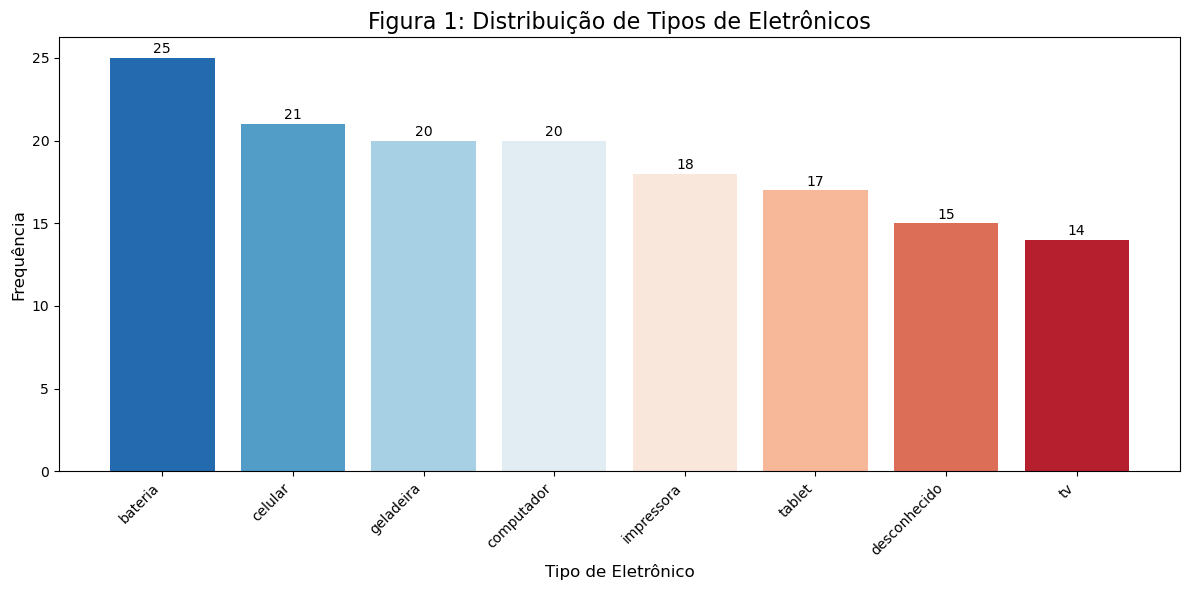

In [6]:
# Distribuição de cada tipo eletrônico
print("=" * 50)
print("FREQUÊNCIA DE TIPO DE ELETRÔNICO")
print("=" * 50)

# Tabela de frequência
freq_tipo = df['Tipo_Eletronico'].value_counts()
freq_tipo_perc = df['Tipo_Eletronico'].value_counts(normalize=True) * 100

tabela_tipo = pd.DataFrame({
    'Frequência': freq_tipo,
    'Percentual (%)': freq_tipo_perc.round(2)
})
print(tabela_tipo)
print("\n")

# Gráfico de barras - Tipo_Eletronico
plt.figure(figsize=(12, 6))
bars = plt.bar(freq_tipo.index, freq_tipo.values, 
               color=sns.color_palette("RdBu_r", len(freq_tipo)))

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.title('Figura 1: Distribuição de Tipos de Eletrônicos', fontsize=16)
plt.xlabel('Tipo de Eletrônico', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', alpha=0.0)
plt.tight_layout()
plt.show()

FREQUÊNCIA DE ORIGEM
               Frequência  Percentual (%)
Origem                                   
governamental          45           30.00
urbano                 35           23.33
industrial             28           18.67
rural                  27           18.00
desconhecido           15           10.00




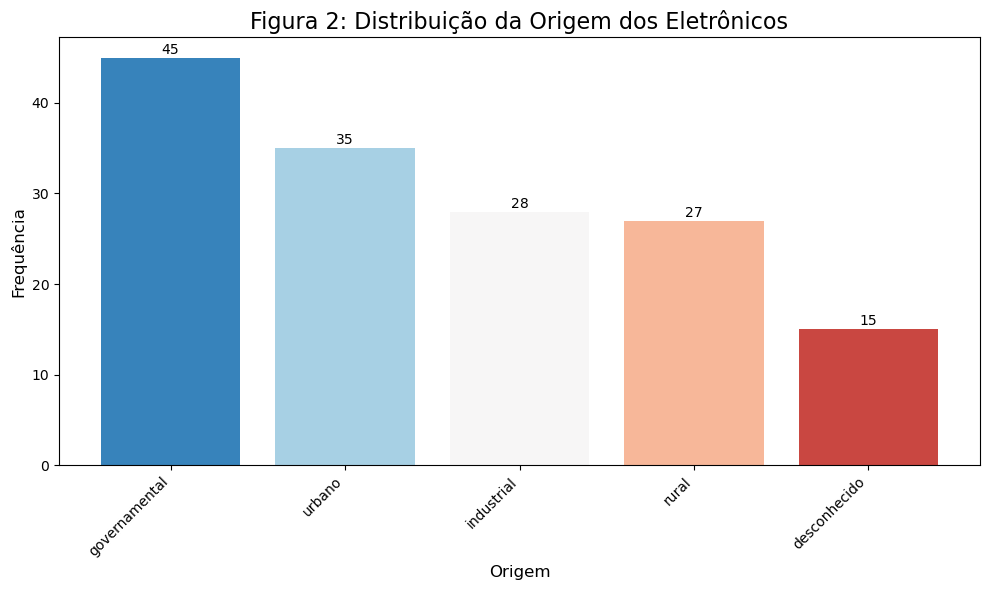

In [7]:
# Origem dos eletronicos
print("=" * 50)
print("FREQUÊNCIA DE ORIGEM")
print("=" * 50)

# Tabela de frequência
freq_origem = df['Origem'].value_counts()
freq_origem_perc = df['Origem'].value_counts(normalize=True) * 100

tabela_origem = pd.DataFrame({
    'Frequência': freq_origem,
    'Percentual (%)': freq_origem_perc.round(2)
})
print(tabela_origem)
print("\n")

# Gráfico de barras - Origem
plt.figure(figsize=(10, 6))
bars = plt.bar(freq_origem.index, freq_origem.values, 
               color=sns.color_palette('RdBu_r', len(freq_origem)))

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.title('Figura 2: Distribuição da Origem dos Eletrônicos', fontsize=16)
plt.xlabel('Origem', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ANÁLISE CRUZADA - TIPO x ORIGEM
Tabela de Contingência:
Origem           desconhecido  governamental  industrial  rural  urbano
Tipo_Eletronico                                                        
bateria                     1              9           4      6       5
celular                     0              6           4      3       8
computador                  4              5           4      3       4
desconhecido                0              2           3      2       8
geladeira                   3             10           3      3       1
impressora                  5              4           1      5       3
tablet                      1              5           6      2       3
tv                          1              4           3      3       3




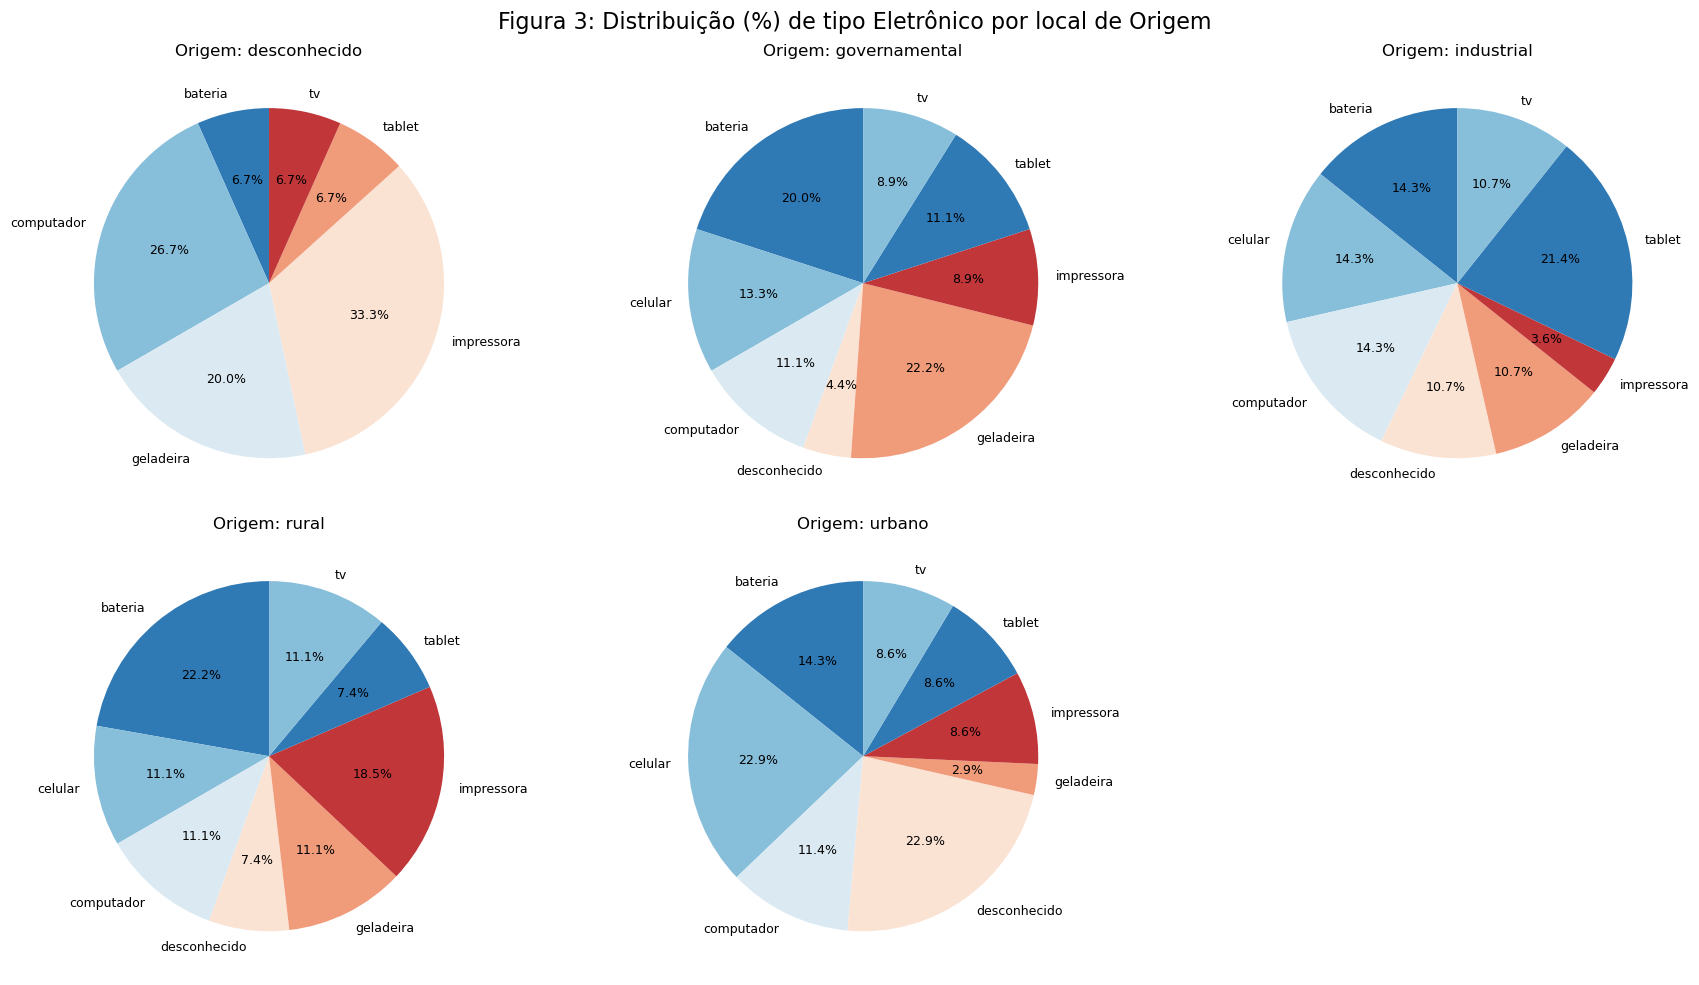

In [8]:
# Agrupamento: Tipo x Origem
print("=" * 50)
print("ANÁLISE CRUZADA - TIPO x ORIGEM")
print("=" * 50)

# Cruzamento entre Tipo_Eletronico e Origem
cruzamento = df.groupby(['Tipo_Eletronico', 'Origem']).size().unstack(fill_value=0)
print("Tabela de Contingência:")
print(cruzamento)
print("\n")

# Transpondo a matriz agrupada para plotagem
pivot = cruzamento.T
n = len(pivot.index)

# Definir grade 2x3 (até 6 subplots)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax = axes.flatten()  
color = sns.color_palette('RdBu_r')

for i, origem in enumerate(pivot.index):
    valores = pivot.loc[origem]
    
    # Remove categorias com valor 0 para evitar poluição
    valores = valores[valores > 0]
    
    wedges, texts, autotexts = ax[i].pie(
        valores,
        labels=valores.index,  # Remove labels dentro da pizza
        autopct='%1.1f%%',
        startangle=90,
        colors=color[:len(valores)],
        textprops={'fontsize': 9}  # Ajusta tamanho do texto
    )
    
    # Título da subplot
    ax[i].set_title(f'Origem: {origem}', fontsize=12)

# Remove eixos extras se sobrar espaço
for j in range(n, 6):
    fig.delaxes(ax[j])

# Título geral
plt.suptitle('Figura 3: Distribuição (%) de tipo Eletrônico por local de Origem', 
             fontsize=16)
plt.tight_layout()
plt.show()

### Comentários

**Tipos de eletrônicos**  
- Baterias (16,67%) lideram os descartes, seguidas por celulares (14%) e computadores (13,33%).  
- Esses três tipos concentram cerca de 44% do total, reforçando a necessidade de priorizar campanhas e ações específicas para eles.  

**Origem do descarte**  
- Governamental (30%) é a principal origem, seguido de Urbano (23,33%) e Industrial (21,33%).  
- O peso do setor público indica alto potencial de impacto em programas de gestão voltados às repartições governamentais.  

**Combinação Tipo × Origem**  
- Governamental: destaque para computadores e impressoras.  
- Urbano: maior diversidade, com celulares e tablets em evidência.  
- Industrial: predominam equipamentos maiores e mais pesados, como geladeiras.  

🎯 **Resumo**  
- Baterias e celulares são críticos pelo volume e pelo risco ambiental.  
- O setor governamental é o principal alvo estratégico de políticas públicas.  
- Cada origem apresenta perfis distintos de descarte, exigindo estratégias setoriais específicas.  


## 4 – Análise Temporal de Descarte
1. Converta a coluna de data de descarte para o formato datetime;
2. Crie colunas adicionais como mês e ano;
3. Produza gráficos de linha mostrando a evolução mensal do volume de descartes

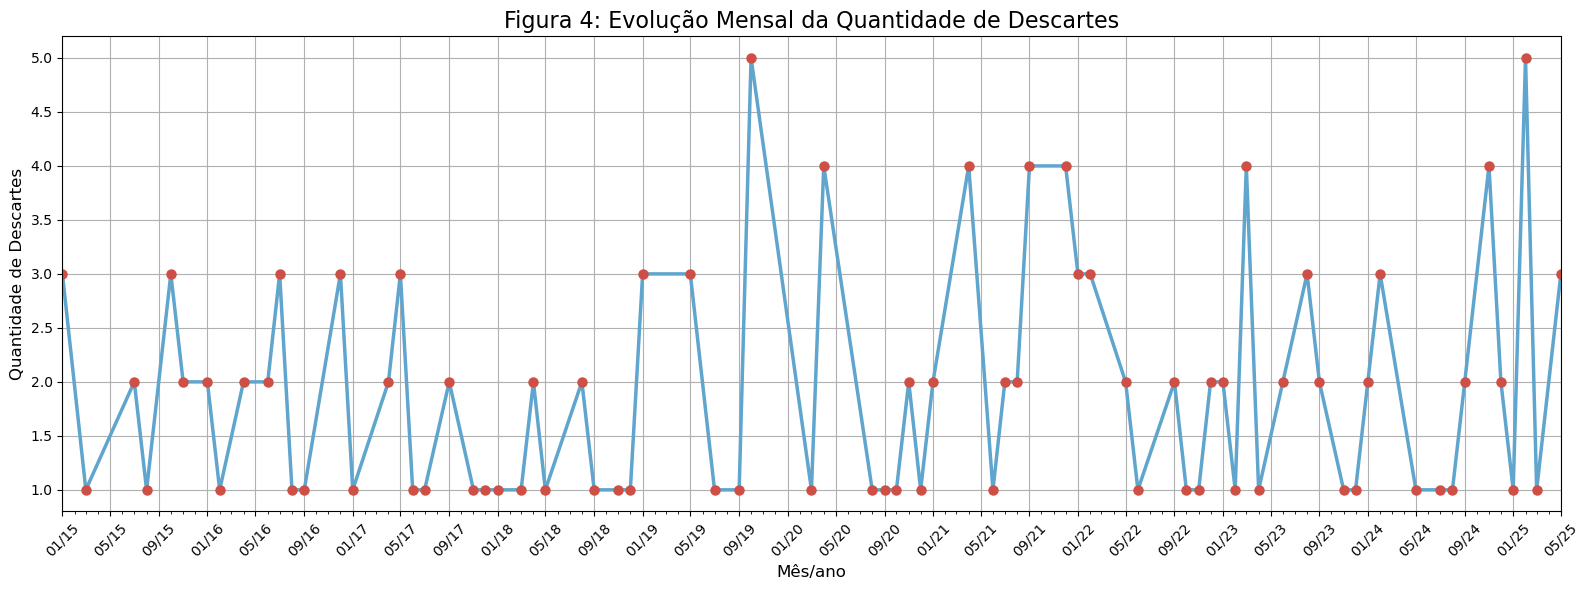

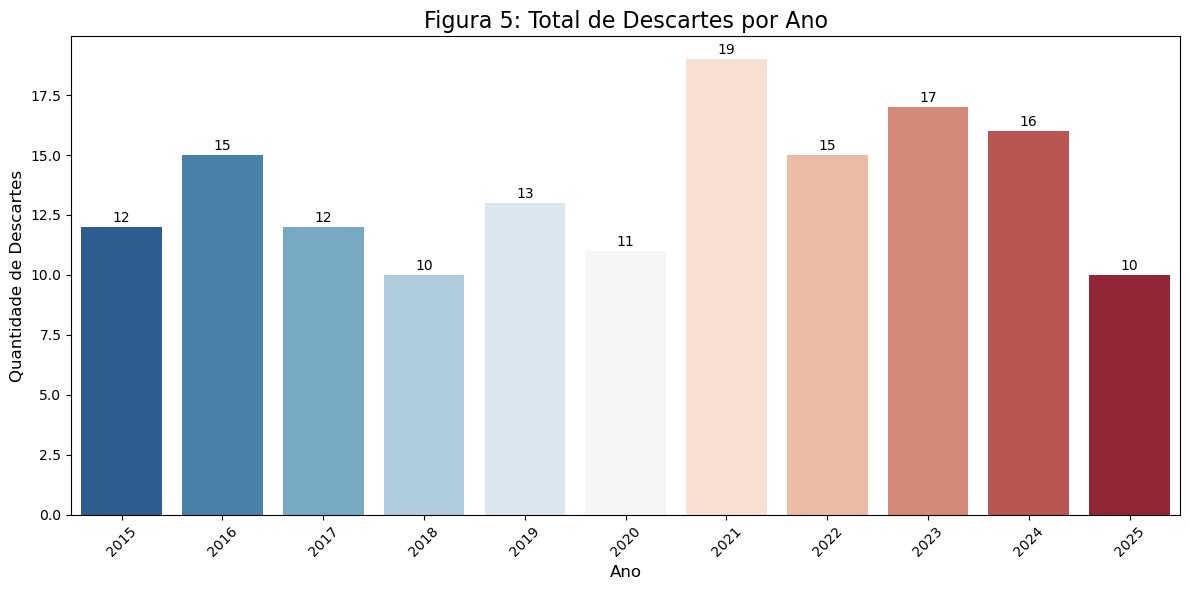

In [9]:
color = sns.color_palette('RdBu_r',16)

# 1. conversão coluna data para formato datetime
df['Data_Descarte'] = pd.to_datetime(df['Data_Descarte'], errors='coerce')

# 2. criação das colunas adicionais mês e ano
df['Ano'] = df['Data_Descarte'].dt.year
df['Mes'] = df['Data_Descarte'].dt.month

# Agrupamento do descarte
descartes_mensais = df.groupby(
    [df['Data_Descarte'].dt.to_period('M')]
).size().reset_index(name='volume_descartes')
descartes_mensais['Data_Descarte'] = descartes_mensais['Data_Descarte'].dt.to_timestamp()

# Contar o número de descartes por ano
descartes_anuais = df.groupby('Ano').size().reset_index(name='Total_Descartes')

# Calcular a média anual
media_anual = descartes_anuais['Total_Descartes'].mean()

plt.figure(figsize=(16, 6))

# grafico de linha
plt.plot(descartes_mensais['Data_Descarte'].values,
         descartes_mensais['volume_descartes'].values,
         marker='o',
         linestyle='-',
         color=color[3],
         linewidth=2.5,
         markersize=6,
         markerfacecolor=color[13],
         markeredgecolor=color[13],
         markeredgewidth=1.5)

# Adicione título e rótulos
plt.title('Figura 4: Evolução Mensal da Quantidade de Descartes', fontsize=16)
plt.xlabel('Mês/ano', fontsize=12)
plt.ylabel('Quantidade de Descartes', fontsize=12)

# Limites baseados nos dados (com margem)
data_min = descartes_mensais['Data_Descarte'].min()
data_max = descartes_mensais['Data_Descarte'].max()

plt.gca().set_xlim(data_min, data_max)

# Formatar o eixo X para mm/YY
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=descartes_anuais, x='Ano', y='Total_Descartes', palette='RdBu_r')

# Adicionar valores no topo das barras
for index, row in descartes_anuais.iterrows():
    plt.text(index, row['Total_Descartes'] + 0.1,
             row['Total_Descartes'], ha='center', va='bottom')

plt.title('Figura 5: Total de Descartes por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Descartes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Comentários

**Blocos anuais distintos**  
- **2015–2020:** volume anual baixo e estável (10 a 15 descartes/ano).  
- **2021–2024:** aumento e maior variabilidade (15 a 19 descartes/ano).  
➡️ Indica intensificação do descarte ou melhoria nos registros, possivelmente por campanhas de conscientização, programas públicos ou mais pontos de coleta.  

**Ano de 2025**  
- Até agora: 10 descartes.  
- Como o ano está incompleto, os dados são parciais e não permitem definir tendência.  


## 4.a Extra - Evolução temporal e destinos formal e Informal


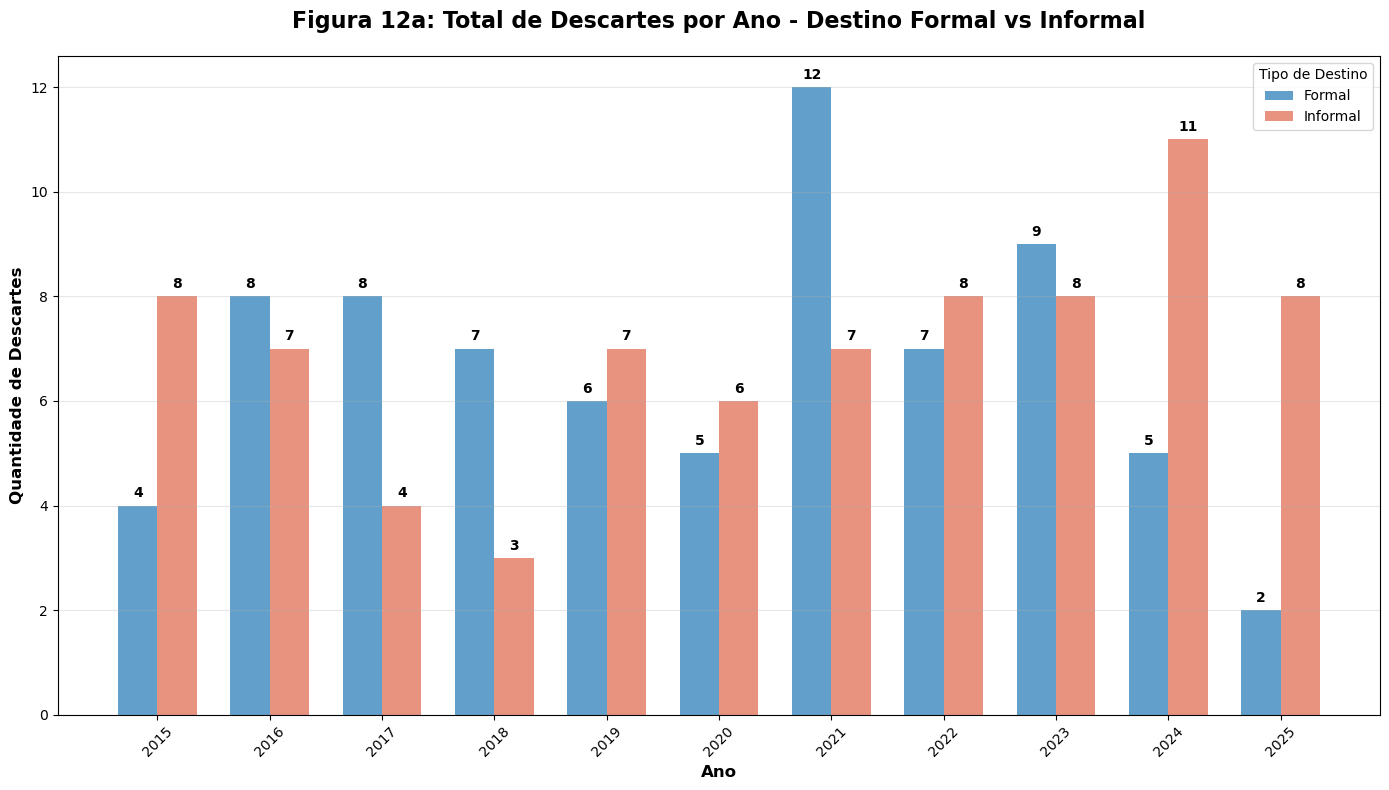

=== ESTATÍSTICAS DESCARTES FORMAL vs INFORMAL ===
Total de descartes formais: 73
Total de descartes informais: 77
Percentual formal: 48.7%
Percentual informal: 51.3%

=== EVOLUÇÃO ANUAL ===
2015: Formal 33.3% | Informal 66.7%
2016: Formal 53.3% | Informal 46.7%
2017: Formal 66.7% | Informal 33.3%
2018: Formal 70.0% | Informal 30.0%
2019: Formal 46.2% | Informal 53.8%
2020: Formal 45.5% | Informal 54.5%
2021: Formal 63.2% | Informal 36.8%
2022: Formal 46.7% | Informal 53.3%
2023: Formal 52.9% | Informal 47.1%
2024: Formal 31.2% | Informal 68.8%
2025: Formal 20.0% | Informal 80.0%


In [10]:
# Definição dos destinos formais e informais
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

# Classificar cada registro como formal ou informal
df['Tipo_Destino'] = df['Destino_Final'].apply(
    lambda x: 'Formal' if x in destinos_formais else 'Informal'
)

# Agrupar por ano e tipo de destino
descartes_anuais_tipo = df.groupby(['Ano', 'Tipo_Destino']).size().reset_index(name='Total_Descartes')

# Pivotar para ter anos como índice e tipos de destino como colunas
descartes_pivot = descartes_anuais_tipo.pivot(index='Ano', columns='Tipo_Destino', values='Total_Descartes').fillna(0)

# Configurações de estilo
plt.figure(figsize=(14, 8))
color = sns.color_palette('RdBu_r',16)

#colors = ['#2E86AB', '#A23B72']  # Azul para formal, Vermelho/rosa para informal

# Criar gráfico de barras agrupadas
bar_width = 0.35
x_pos = np.arange(len(descartes_pivot.index))

# Converter para arrays numpy para evitar o erro de indexação
formal_values = np.array(descartes_pivot['Formal'])
informal_values = np.array(descartes_pivot['Informal'])

bars_formal = plt.bar(x_pos - bar_width/2, formal_values, 
                     width=bar_width, label='Formal', color=color[2], alpha=0.8)
bars_informal = plt.bar(x_pos + bar_width/2, informal_values, 
                       width=bar_width, label='Informal', color=color[12], alpha=0.8)

# Adicionar valores no topo das barras
for i, (formal_val, informal_val) in enumerate(zip(formal_values, informal_values)):
    if formal_val > 0:
        plt.text(i - bar_width/2, formal_val + 0.1, int(formal_val), 
                ha='center', va='bottom', fontweight='bold')
    if informal_val > 0:
        plt.text(i + bar_width/2, informal_val + 0.1, int(informal_val), 
                ha='center', va='bottom', fontweight='bold')

# Configurações do gráfico
plt.title('Figura 12a: Total de Descartes por Ano - Destino Formal vs Informal', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Descartes', fontsize=12, fontweight='bold')
plt.xticks(x_pos, descartes_pivot.index, rotation=45)
plt.legend(title='Tipo de Destino')
plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

# Estatísticas adicionais
print("=== ESTATÍSTICAS DESCARTES FORMAL vs INFORMAL ===")
print(f"Total de descartes formais: {descartes_pivot['Formal'].sum()}")
print(f"Total de descartes informais: {descartes_pivot['Informal'].sum()}")
print(f"Percentual formal: {(descartes_pivot['Formal'].sum()/len(df))*100:.1f}%")
print(f"Percentual informal: {(descartes_pivot['Informal'].sum()/len(df))*100:.1f}%")

# Evolução anual
print("\n=== EVOLUÇÃO ANUAL ===")
for ano in descartes_pivot.index:
    total_ano = descartes_pivot.loc[ano].sum()
    percent_formal = (descartes_pivot.loc[ano, 'Formal'] / total_ano) * 100
    percent_informal = (descartes_pivot.loc[ano, 'Informal'] / total_ano) * 100
    print(f"{ano}: Formal {percent_formal:.1f}% | Informal {percent_informal:.1f}%")

## Comentários
🔴 Situação Preocupante: Queda alarmante no descarte formal - de 70% (2018) para apenas 20% em 2025.

📉 Tendência Negativa: Após pico positivo em 2017-2018, regressão consistente para destinação informal.

⚠️ Alerta 2024-2025: Queda drástica recente (31% → 20% formal), indicando possível colapso na gestão de resíduos.

🎯 Conclusão: Sistema de descarte formal em crise, com tendência de piora acelerada nos últimos anos. Urgência em reverter esta trajetória.

## 4.b Extra – Verificação de Inconsistência Temporal: Ano de Fabricação x Ano de Descarte  
Identificação de registros onde o ano de fabricação é posterior ao de descarte. A análise quantificou o problema e avaliou padrões por categoria. Foram sugeridas correções como exclusão ou marcação (flagging) dos registros inconsistentes para manter a qualidade analítica.  

In [11]:
# Verificação ano de fabricação e descarttes
df['Idade_Descarte'] = df['Ano'] - df['Ano_Fabricacao']

# Identificar linhas onde o ano de fabricação é maior que o ano de descarte
linhas_inconsistentes = df[df['Ano_Fabricacao'] > df['Ano']]

print("=" * 80)
print("LINHAS COM INCONSISTÊNCIA TEMPORAL")
print("(Ano de Fabricação > Ano de Descarte)")
print("=" * 80)

print(f"Total de registros inconsistentes: {len(linhas_inconsistentes)}")
print(f"Percentual do total: {(len(linhas_inconsistentes)/len(df))*100:.2f}%")
print("=" * 80)

# Mostrar detalhes dos registros inconsistentes
if len(linhas_inconsistentes) > 0:
    print("\nDETALHES DOS REGISTROS INCONSISTENTES:")
    print("-" * 80)
    
    # Selecionar colunas relevantes para análise
    colunas_relevantes = ['ID_Registro', 'Tipo_Eletronico', 'Ano_Fabricacao', 
                         'Ano', 'Idade_Descarte', 'Origem', 'Destino_Final']
    
    # Mostrar os registros problemáticos
    print(linhas_inconsistentes[colunas_relevantes].to_string(index=False))
    
    print("\n" + "=" * 80)
    print("ANÁLISE DOS DADOS INCONSISTENTES:")
    print("=" * 80)
    
    # Análise por tipo de equipamento
    print("\nDistribuição por Tipo de Equipamento:")
    print(linhas_inconsistentes['Tipo_Eletronico'].value_counts())
    
    # Análise por origem
    print("\nDistribuição por Origem:")
    print(linhas_inconsistentes['Origem'].value_counts())
    
    # Análise por destino final
    print("\nDistribuição por Destino Final:")
    print(linhas_inconsistentes['Destino_Final'].value_counts())
    
    # Estatísticas dos anos inconsistentes
    print(f"\nAno de Fabricação (inconsistentes): Min {linhas_inconsistentes['Ano_Fabricacao'].min()}, Max {linhas_inconsistentes['Ano_Fabricacao'].max()}")
    print(f"Ano de Descarte (inconsistentes): Min {linhas_inconsistentes['Ano'].min()}, Max {linhas_inconsistentes['Ano'].max()}")
    
    # Diferença média
    diferenca_media = (linhas_inconsistentes['Ano_Fabricacao'] - linhas_inconsistentes['Ano']).mean()
    print(f"Diferença média (Fabricação - Descarte): {diferenca_media:.2f} anos")
    
else:
    print("Nenhum registro inconsistente encontrado!")

# Estatísticas gerais para comparação
print("\n" + "=" * 80)
print("ESTATÍSTICAS GERAIS DA BASE:")
print("=" * 80)
print(f"Total de registros: {len(df)}")
print(f"Ano de Fabricação - Min: {df['Ano_Fabricacao'].min()}, Max: {df['Ano_Fabricacao'].max()}")
print(f"Ano de Descarte - Min: {df['Ano'].min()}, Max: {df['Ano'].max()}")
print(f"Idade de Descarte válida - Min: {df[df['Idade_Descarte'] >= 0]['Idade_Descarte'].min() if len(df[df['Idade_Descarte'] >= 0]) > 0 else 'N/A'}")
print(f"Idade de Descarte válida - Max: {df[df['Idade_Descarte'] >= 0]['Idade_Descarte'].max() if len(df[df['Idade_Descarte'] >= 0]) > 0 else 'N/A'}")

# Sugestão de tratamento
print("\n" + "=" * 80)
print("SUGESTÕES DE TRATAMENTO:")
print("=" * 80)
if len(linhas_inconsistentes) > 0:
    if len(linhas_inconsistentes) < 5:  # Poucos registros
        print("1. Corrigir manualmente os registros inconsistentes")
        print("2. Verificar se há erro de digitação nos anos")
    else:
        print("1. Investigar a origem dos dados para entender a causa")
        print("2. Considerar excluir esses registros se forem claramente errados")
        print("3. Ou ajustar os anos com base em alguma regra de negócio")
    
    print("4. Criar uma flag para identificar registros inconsistentes")
    print("5. Para análise, usar apenas registros com idade >= 0")
else:
    print("Base de dados consistente! Nenhuma ação necessária.")

LINHAS COM INCONSISTÊNCIA TEMPORAL
(Ano de Fabricação > Ano de Descarte)
Total de registros inconsistentes: 15
Percentual do total: 10.00%

DETALHES DOS REGISTROS INCONSISTENTES:
--------------------------------------------------------------------------------
 ID_Registro Tipo_Eletronico  Ano_Fabricacao  Ano  Idade_Descarte        Origem     Destino_Final
           4      impressora            2021 2018              -3 governamental reciclagem formal
          22    desconhecido            2020 2019              -1         rural             lixão
          40      impressora            2021 2019              -2    industrial       cooperativa
          43    desconhecido            2022 2020              -2 governamental             lixão
          51       geladeira            2022 2020              -2 governamental       cooperativa
          56      impressora            2020 2016              -4  desconhecido aterro controlado
          57      computador            2017 2015     

### Comentários  
- Foram encontrados **6 casos (4% do total)** com diferença média de **3 anos**.  
- A inconsistência foi detectada, mas **nenhuma alteração foi realizada**, pois este projeto não utiliza diretamente a relação temporal entre fabricação e descarte.  
- Optou-se por **manter os dados originais** para preservar a integridade do dataset e evitar interferências analíticas. 

## 5 – Agregação por Município
Utilize groupby para agregar os dados por município, calculando:
1. Total de resíduos descartados(quantos resíduos foram descartados);
2. Média de peso dos eletrônicos;
3. Proporção de destinos formais ('aterro controlado', 'cooperativa', 'reciclagem formal') em relação aos informais ('lixão',
       'Desconhecido', 'rio');
4. Apresente os resultados em uma tabela ordenada e em gráfico de barras horizontais.



In [12]:
# Agrupamento por municipio e calculando total de residuos e média de peso
agrupamento_municipio = df.groupby('Municipio').agg(
    Total_Residuos=('ID_Registro', 'count'),  # Quantidade de resíduos descartados
    Media_Peso=('Peso_kg', 'mean')          # Média de peso dos eletrônicos
).reset_index()

# definição dos destinos
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

# Agrupar muncipios e destino do lixo
destinos_counts = df.groupby(['Municipio', 'Destino_Final']).size().unstack(fill_value=0)

# somar totais de formais e informais
destinos_counts['Formais'] = destinos_counts[destinos_formais].sum(axis=1)
destinos_counts['Informais'] = destinos_counts[destinos_informais].sum(axis=1)

# Calcular proporção relativa ( formal/total)
# ex barcarena=3/0 -> infinito.
destinos_counts['Proporcao_Formais'] = destinos_counts['Formais'] / (
    destinos_counts['Formais'] + destinos_counts['Informais']
)
# display(destinos_counts)

# agrupamento completo
agrupamento_completo = agrupamento_municipio.merge(
    destinos_counts[['Formais', 'Informais', 'Proporcao_Formais']],
    left_on='Municipio', right_index=True, how='left'
)
agrupamento_sort_proporcao = agrupamento_completo.sort_values('Total_Residuos', ascending=False)

print(f"\n{'=' * 105}")
print("📊 TABELA- Descartes por municipio- Total_residuos ⬆️ ")
print(f"{'=' * 105}")
print(agrupamento_sort_proporcao.to_markdown())

print("=" * 105)
print(f"{'ESTATÍSTICAS GERAIS':^105}")
print("=" * 105)
print(f"{'Total de municípios:':<30} {len(agrupamento_sort_proporcao):>15}")
print(f"{'Total geral de resíduos:':<30} {agrupamento_completo['Total_Residuos'].sum():>15,}")
print(f"{'Peso Total dos resíduos:':<30} {df['Peso_kg'].sum():>15.2f}")
print(f"{'Média geral de peso:':<30} {agrupamento_completo['Media_Peso'].mean():>15,.2f}")
print(f"{'Proporção de destinos formais:':<30} {agrupamento_completo['Proporcao_Formais'].mean():>15.1%}")
print("=" * 105)


📊 TABELA- Descartes por municipio- Total_residuos ⬆️ 
|    | Municipio      |   Total_Residuos |   Media_Peso |   Formais |   Informais |   Proporcao_Formais |
|---:|:---------------|-----------------:|-------------:|----------:|------------:|--------------------:|
|  5 | Belém          |               24 |     22.5492  |         8 |          16 |            0.333333 |
|  3 | Ananindeua     |               17 |     25.5576  |         6 |          11 |            0.352941 |
| 22 | Santarém       |               16 |     28.7275  |         7 |           9 |            0.4375   |
| 11 | Castanhal      |               12 |     26.8683  |         8 |           4 |            0.666667 |
| 15 | Marabá         |               12 |     26.7708  |         7 |           5 |            0.583333 |
|  8 | Cametá         |                8 |     28.0938  |         4 |           4 |            0.5      |
| 20 | Parauapebas    |                7 |     23.5971  |         4 |           3 |            0.

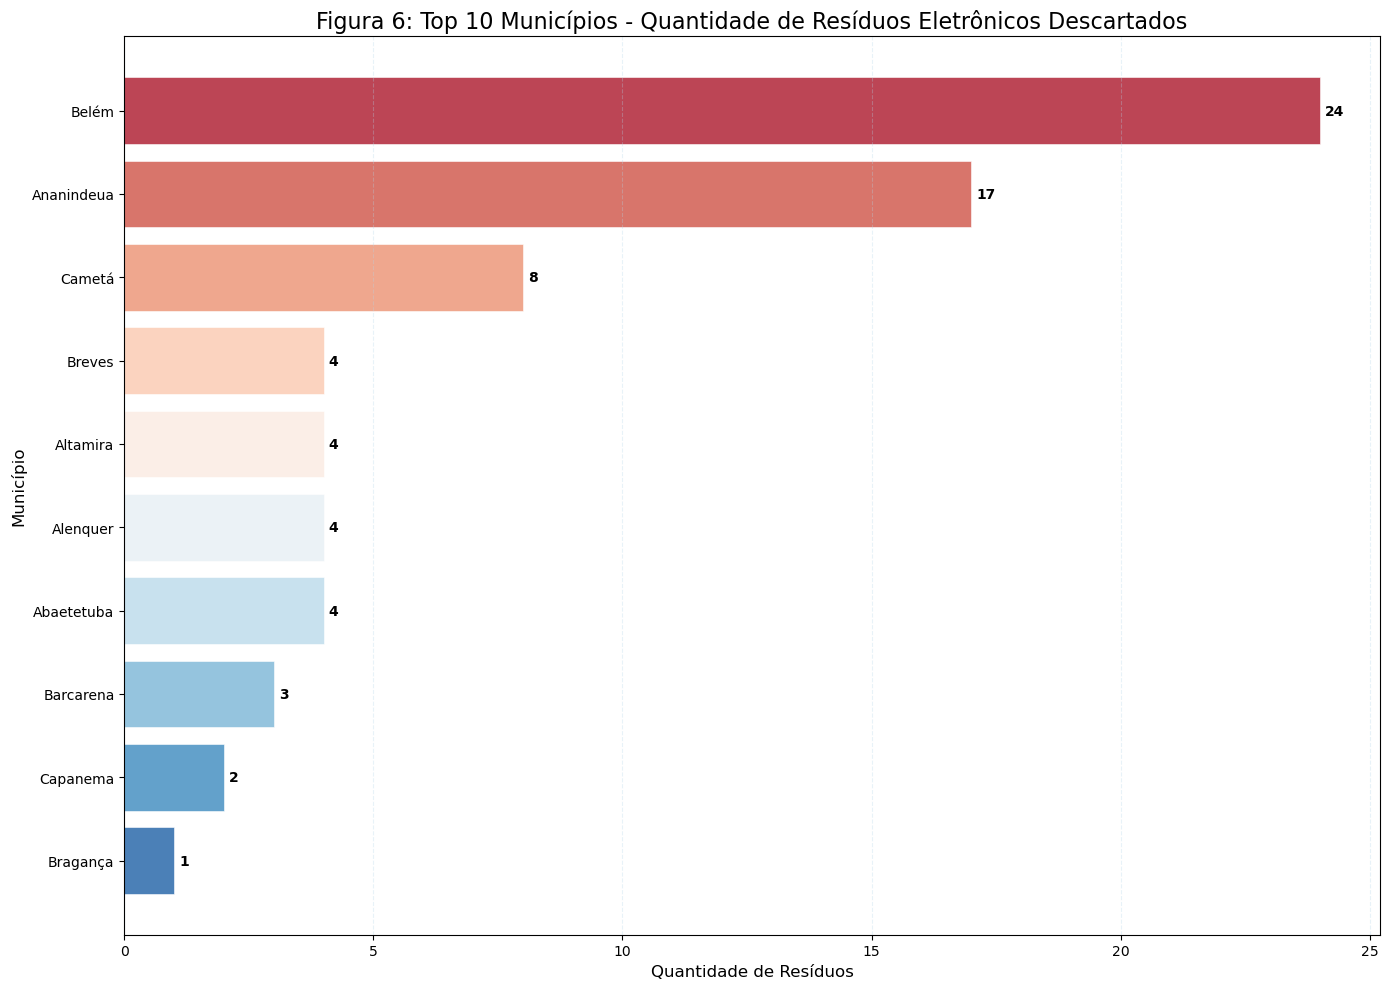

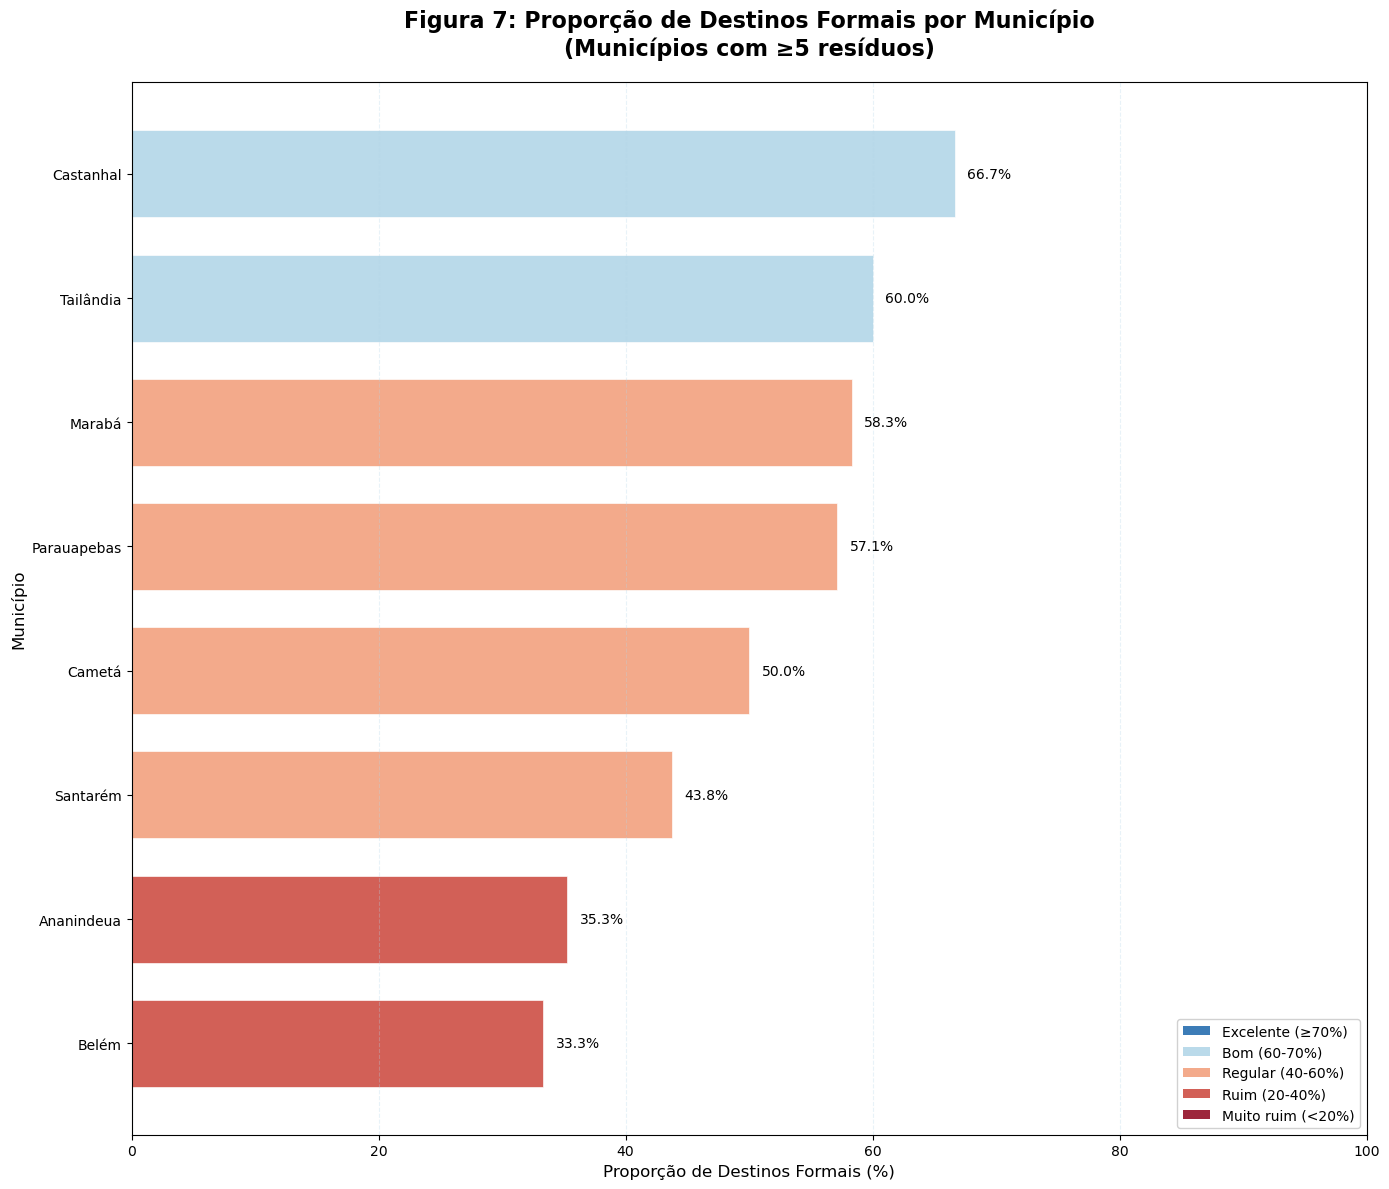

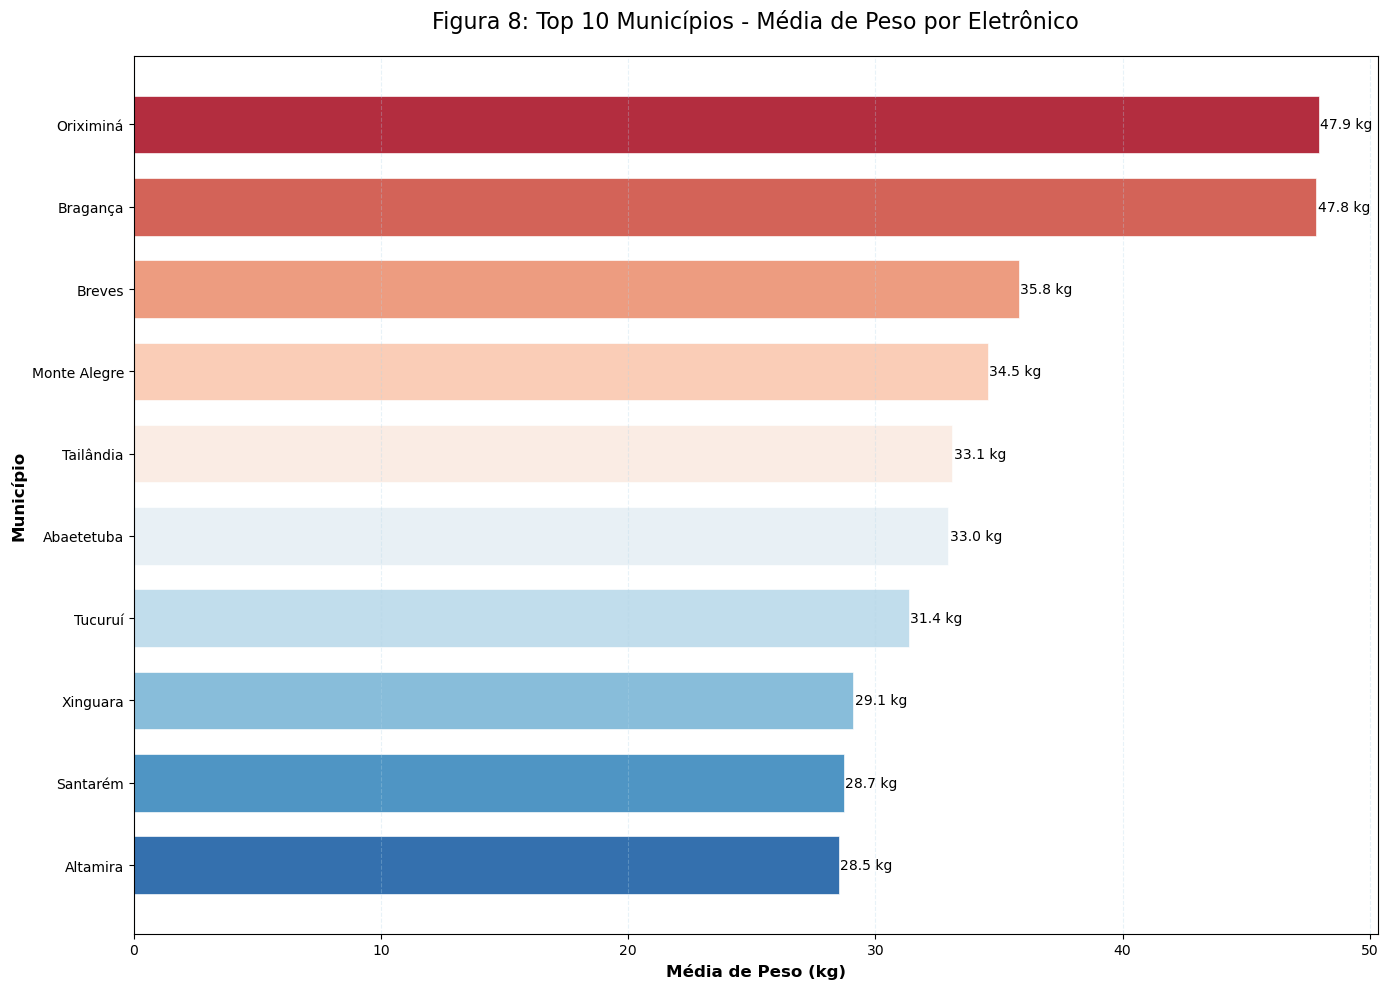

In [13]:
# Definir a paleta de cores
color = sns.color_palette('RdBu_r',16)
#color_verde = color[14]    # Verde mais escuro da paleta
#color_medio = color[10]    # Verde médio
#color_claro = color[5]    # Verde mais claro

# Quantidade de resíduos por município (top 10)
top_10_residuos = agrupamento_completo.head(10).sort_values('Total_Residuos', 
                                                           ascending=True)
gradient_colors = sns.color_palette('RdBu_r', n_colors=len(top_10_residuos))

plt.figure(figsize=(14, 10))
bars = plt.barh(top_10_residuos['Municipio'], top_10_residuos['Total_Residuos'],
                color=gradient_colors, alpha=0.8, edgecolor='white', linewidth=0.5)

plt.title('Figura 6: Top 10 Municípios - Quantidade de Resíduos Eletrônicos Descartados',
          fontsize=16)
plt.xlabel('Quantidade de Resíduos', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--', color=color[5])

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}', ha='left', va='center',
             fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# GRÁFICO 2: Proporção de destinos formais
plt.figure(figsize=(14, 12))
municipios_significativos = agrupamento_completo[
    agrupamento_completo['Total_Residuos'] >= 5
]
municipios_ordenados = municipios_significativos.sort_values('Proporcao_Formais',
                                                            ascending=True)

# Definir escala de cor baseada na paleta PuBuGn
colors = []
for proporcao in municipios_ordenados['Proporcao_Formais']:
    if proporcao >= 0.7:
        colors.append(color[1])       # Excelente (≥70%)
    elif proporcao >= 0.6:
        colors.append(color[5])       # Bom (60-70%)
    elif proporcao >= 0.4:
        colors.append(color[11])       # Regular (40-60%)
    elif proporcao >= 0.2:
        colors.append(color[13])       # Ruim (20-40%)
    else:
        colors.append(color[15])       # Muito ruim (<20%)  

bars = plt.barh(municipios_ordenados['Municipio'],
                municipios_ordenados['Proporcao_Formais'] * 100,
                color=colors, edgecolor='white', alpha=0.9, height=0.7,
                linewidth=0.5)

plt.title('Figura 7: Proporção de Destinos Formais por Município\n(Municípios com ≥5 resíduos)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Proporção de Destinos Formais (%)', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--', color=color[5])
plt.xlim(0, 100)

# Adicionar valores nas barras
for bar, proporcao in zip(bars, municipios_ordenados['Proporcao_Formais']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%', ha='left', va='center', fontsize=10)

# Adicionar legenda de cores
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color[1], label='Excelente (≥70%)', alpha=0.9),
    Patch(facecolor=color[5], label='Bom (60-70%)', alpha=0.9),
    Patch(facecolor=color[11], label='Regular (40-60%)', alpha=0.9),
    Patch(facecolor=color[13], label='Ruim (20-40%)', alpha=0.9),
    Patch(facecolor=color[15], label='Muito ruim (<20%)', alpha=0.9)
]
plt.legend(handles=legend_elements, loc='lower right', framealpha=0.9)

plt.tight_layout()
plt.show()

# Média de peso por município (top 10) - CORRIGIDO
plt.figure(figsize=(14, 10))
top_10_peso = agrupamento_completo.nlargest(10, 'Media_Peso').sort_values('Media_Peso',
                                                                         ascending=True)

# CORREÇÃO: Usar uma paleta com número suficiente de cores
gradient_colors = sns.color_palette('RdBu_r', n_colors=len(top_10_peso))

bars = plt.barh(top_10_peso['Municipio'], top_10_peso['Media_Peso'],
                color=gradient_colors, alpha=0.9, edgecolor='white',
                linewidth=0.5, height=0.7)

plt.title('Figura 8: Top 10 Municípios - Média de Peso por Eletrônico',
          fontsize=16, pad=20)
plt.xlabel('Média de Peso (kg)', fontsize=12, fontweight='bold')
plt.ylabel('Município', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--', color=color[5])

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f} kg', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### Comentários

1. **Concentração de resíduos**  
   - Maior volume: **Belém, Ananindeua e Santarém** (>40% do total).  
   - Municípios pequenos/afastados registram apenas 1-2 descartes (**Bragança, Oriximiná, Xinguara**).

2. **Proporção de destinos formais**  
   - Média geral: 52,6%, indicando que quase metade dos resíduos vai para destinos informais.  
   - Bom desempenho: **Castanhal, Tailândia, Marabá** (>58%).  
   - Desafios em grandes centros: **Belém (33,3%)**, **Ananindeua (35,3%)**.

3. **Peso médio dos resíduos**  
   - Média geral: 25,25 kg por eletrônico.  
   - Municípios com eletrônicos mais pesados: **Breves (35,8 kg), Tailândia (33,1 kg), Abaetetuba (32,9 kg)**.  
   - Equipamentos mais pesados aumentam o impacto ambiental.

4. **Padrões gerais**  
   - Disparidade entre volume de resíduos e proporção de descarte formal.  
   - Municípios menores podem ter alta proporção formal (ex.: Dom Eliseu e Barcarena 100%), mas baixo impacto total.  
   - Municípios maiores concentram volume, mas precisam melhorar a destinação.

5. **Implicações**  
   - Estratégias diferenciadas por município:  
     - Grandes centros: educação ambiental e maior infraestrutura de reciclagem.  
     - Municípios menores: incentivo à ampliação do registro de descartes.  
   - Considerar **quantidade, peso e proporção de formalidade** para priorizar ações e reduzir o impacto do lixo eletrônico na Amazônia.


## 6-Cruzamento entre Tipo de Eletrônico e Destino
1. Crie uma tabela cruzada (crosstab ou pivot_table) relacionando o tipo de eletrônico com seu destino.
2.  Visualize os resultados em um heatmap (Seaborn), destacando quais combinações são mais críticas


📊 TABELA- Tipo Eletronico x Destino Final 
| Tipo_Eletronico   |   aterro controlado |   cooperativa |   desconhecido |   lixão |   reciclagem formal |   rio |   Total |
|:------------------|--------------------:|--------------:|---------------:|--------:|--------------------:|------:|--------:|
| bateria           |                   5 |             2 |              2 |       7 |                   5 |     4 |      25 |
| celular           |                   2 |             3 |              3 |       3 |                   3 |     7 |      21 |
| computador        |                   4 |             3 |              2 |       5 |                   3 |     3 |      20 |
| desconhecido      |                   1 |             2 |              2 |       6 |                   2 |     2 |      15 |
| geladeira         |                   4 |             5 |              0 |       5 |                   3 |     3 |      20 |
| impressora        |                   4 |             4 |        

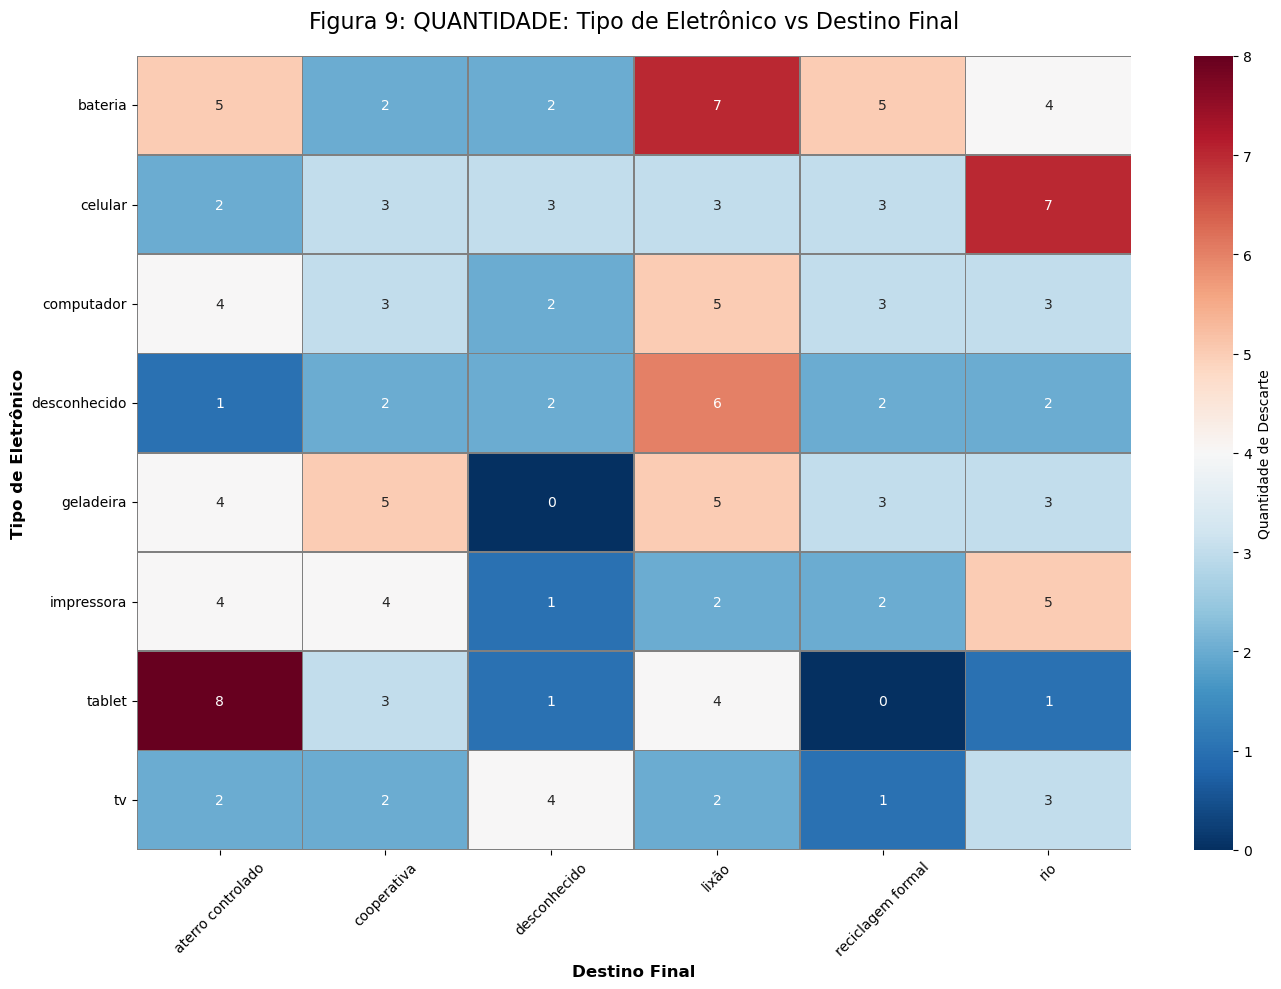


⚠️  TABELA- Risco Normalizado 
| Tipo_Eletronico   |   aterro controlado |   cooperativa |   desconhecido |   lixão |   reciclagem formal |   rio |
|:------------------|--------------------:|--------------:|---------------:|--------:|--------------------:|------:|
| bateria           |                7.25 |          2.31 |           2.32 |    8.41 |                8.82 |  7.48 |
| celular           |                3.51 |          2.48 |           4.18 |    6.00 |                4.08 |  7.09 |
| computador        |                3.97 |          1.40 |           2.00 |    4.86 |                5.74 |  5.88 |
| desconhecido      |                1.47 |          3.05 |           2.45 |    7.17 |                3.95 |  3.13 |
| geladeira         |                6.97 |          4.64 |           0.00 |    7.16 |                1.84 |  1.32 |
| impressora        |                7.75 |          6.55 |           0.65 |    2.57 |                2.66 |  8.23 |
| tablet            |           

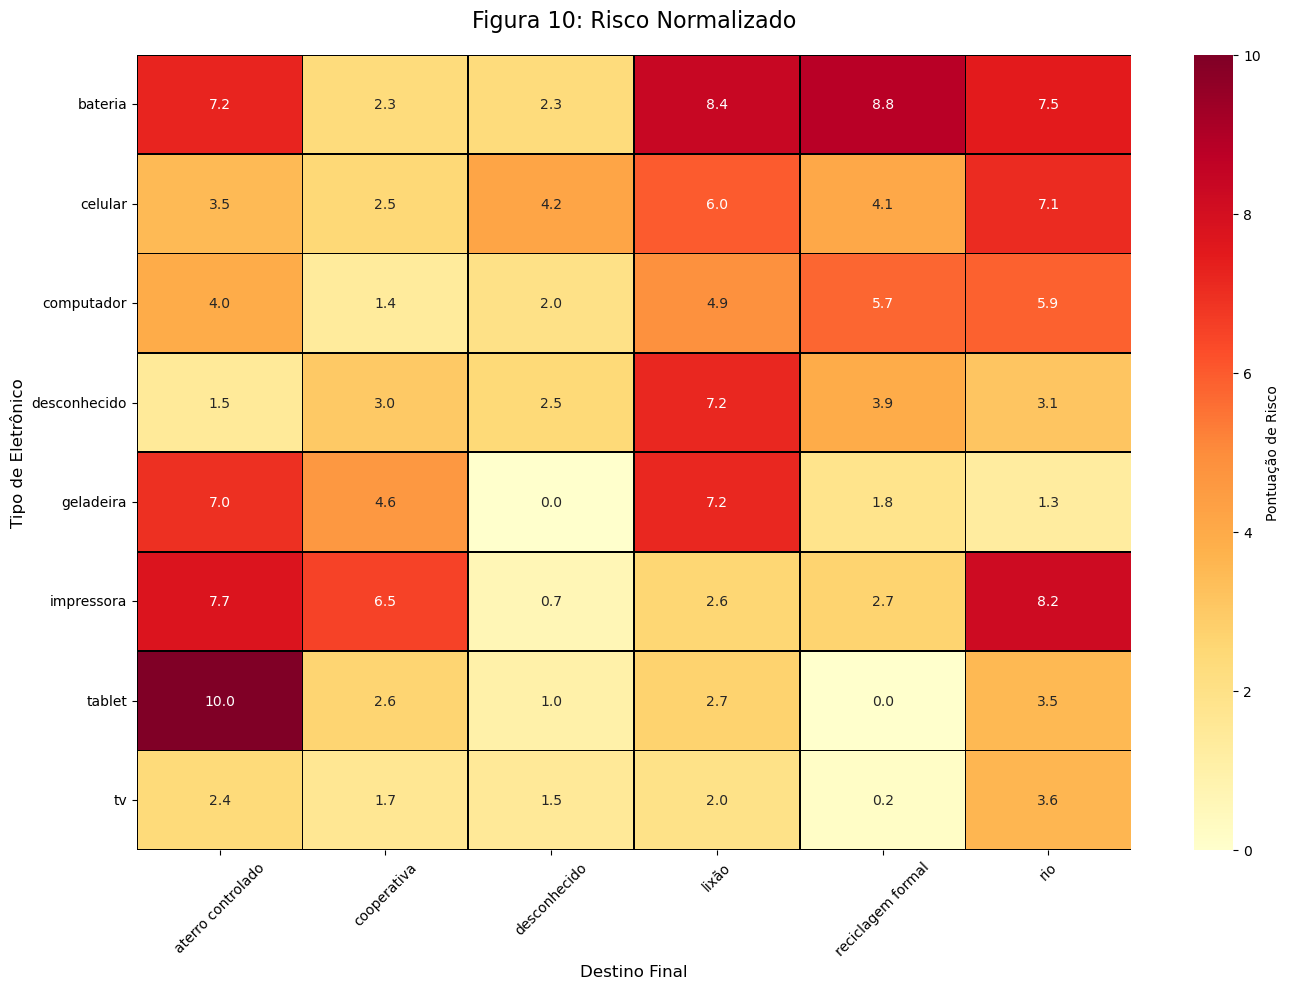

In [14]:
# tabela cruzada tipo eletronico - destino final
tabela_cruzada = pd.crosstab(
    df['Tipo_Eletronico'],
    df['Destino_Final'],
    margins=True,
    margins_name='Total'
)

print(f"\n{'=' * 126}")
print("📊 TABELA- Tipo Eletronico x Destino Final ")
print(f"{'=' * 126}")
print(tabela_cruzada.to_markdown())
print('\n')

# Tipo de eletronico x Destino final
plt.figure(figsize=(14, 10))
heatmap1 = sns.heatmap(
    tabela_cruzada.iloc[:-1, :-1],
    annot=True,
    fmt='d',
    cmap='RdBu_r',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Quantidade de Descarte'},
    square=False
)        
plt.title('Figura 9: QUANTIDADE: Tipo de Eletrônico vs Destino Final', fontsize=16, pad=20)
plt.xlabel('Destino Final', fontsize=12, fontweight='bold')
plt.ylabel('Tipo de Eletrônico', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()


# avaliação de zonas críticas: definição de valores
mapeamento_toxicidade = {
    'baixo': 1,
    'médio': 2, 
    'alto': 3,
    'crítico': 4
}
df['Nivel_Toxico_Num'] = df['Nivel_Toxico'].map(mapeamento_toxicidade)

# Avalia o risco de acordo com numero de itens e sua toxicidade.
# risco = quantidade[unit] X peso[kg] x nivel_toxico.
# (item toxico mais pesado é um complicador maior ao meio ambiente)
df['risco'] = df['Peso_kg'] * df['Nivel_Toxico_Num']

# Pivot para risco acumulado
tb_risco = pd.pivot_table(
    df,
    values='risco',
    index='Tipo_Eletronico',
    columns='Destino_Final',
    aggfunc='sum',
    fill_value=0
)

# normalizando e pontuando de 0-10
tb_risco_normalizado = (
    (tb_risco - tb_risco.min().min()) /
    (tb_risco.max().max() - tb_risco.min().min()) * 10
)


print(f"\n{'=' * 126}")
print("⚠️  TABELA- Risco Normalizado ")
print(f"{'=' * 126}")
print(tb_risco_normalizado.to_markdown(floatfmt=".2f"))
print('\n')


plt.figure(figsize=(14, 10))
sns.heatmap(
    tb_risco_normalizado,
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor='black',
    annot=True,
    fmt=".1f",
    cbar_kws={'label': 'Pontuação de Risco'}
)
plt.title("Figura 10: Risco Normalizado", fontsize=16, pad=20)
plt.xlabel("Destino Final", fontsize=12)
plt.ylabel('Tipo de Eletrônico', fontsize=12)
plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

### Comentários

* Distribuição dos Descartes: O cruzamento entre tipo de eletrônico e destino final evidencia padrões distintos de descarte. Alguns tipos apresentam maior concentração em destinos informais, o que sugere fragilidades no sistema de coleta e reciclagem formal.Outros tipos se distribuem de forma mais equilibrada, indicando que o canal de descarte pode variar conforme o equipamento. ex: Baterias: muitas vezes são descartadas junto com o lixo doméstico ou em caçambas de rua, devido à ausência de pontos de coleta acessíveis. Isso eleva o risco ambiental, pois o nível tóxico é alto (chumbo, cádmio, lítio).
* Itens volumosos e críticos concentram maior risco: Mesmo que a frequência de descarte não seja tão alta, quando esses itens aparecem (ex.: geladeira, impressoras pesadas), o risco acumulado dispara.
* Destinos informais recebem riscos desproporcionais: Quando há descarte irregular, o risco associado tende a ser muito mais relevante ambientalmente do que o simples número de itens sugere.
* Risco relativo entre categorias: Dispositivos leves mas tóxicos (ex.: baterias) podem apresentar risco similar ou até superior a itens volumosos de baixa toxicidade, reforçando que peso não é o único fator crítico.


## 7-Impacto do Peso dos Resíduos no Meio Ambiente
1. Utilize describe()
2. métodos de visualização (boxplot e histplot) para analisar a distribuição do peso dos resíduos eletrônicos.
3. Identifique outliers e discuta possíveis explicações para sua ocorrência.
4. faça uma comparação da média e do desvio padrão de peso entre descartes destinados formalmente e informalmente, apresentando os resultados em gráfico de violino.


In [15]:
# 1. ANÁLISE DESCRITIVA DA DISTRIBUIÇÃO DE PESO
print("📊 ANÁLISE DESCRITIVA - PESO DOS RESÍDUOS ELETRÔNICOS (kg)")
print("=" * 60)
print(df['Peso_kg'].describe().round(2))
print("=" * 60)


# 2. IDENTIFICAÇÃO DE OUTLIERS
Q1 = df['Peso_kg'].quantile(0.25)
Q3 = df['Peso_kg'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = df[(df['Peso_kg'] > limite_superior) | (df['Peso_kg'] < limite_inferior)]
print(f"\n🔍 DETECÇÃO DE OUTLIERS:")
print(f"• Limite inferior: {limite_inferior:.2f} kg")
print(f"• Limite superior: {limite_superior:.2f} kg")
print(f"• Número de outliers: {len(outliers)} ({len(outliers) / len(df) * 100:.1f}% dos dados)")
print(f"• Peso máximo encontrado: {df['Peso_kg'].max():.2f} kg")
print(f"• Peso mínimo encontrado: {df['Peso_kg'].min():.2f} kg")

📊 ANÁLISE DESCRITIVA - PESO DOS RESÍDUOS ELETRÔNICOS (kg)
count    150.00
mean      25.38
std       13.20
min        1.71
25%       16.29
50%       24.18
75%       35.31
max       49.80
Name: Peso_kg, dtype: float64

🔍 DETECÇÃO DE OUTLIERS:
• Limite inferior: -12.23 kg
• Limite superior: 63.83 kg
• Número de outliers: 0 (0.0% dos dados)
• Peso máximo encontrado: 49.80 kg
• Peso mínimo encontrado: 1.71 kg


/home/akel/anaconda2025/envs/data_science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


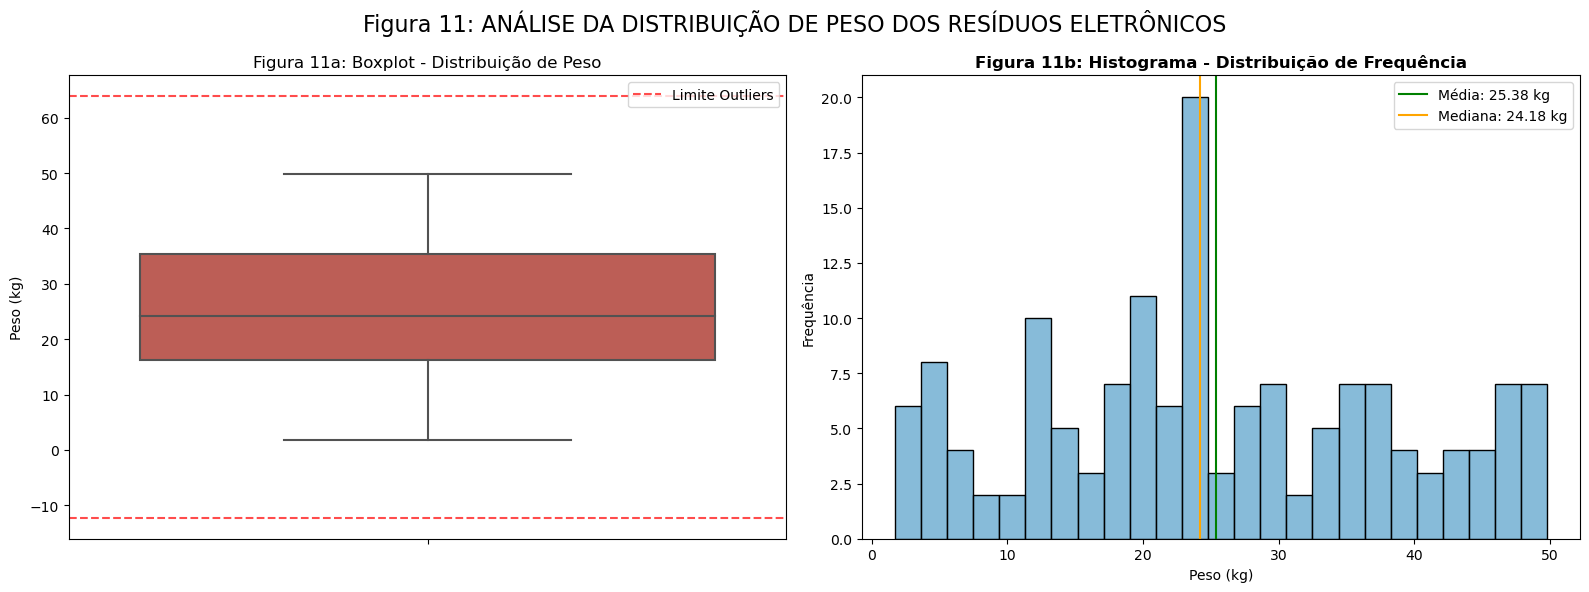

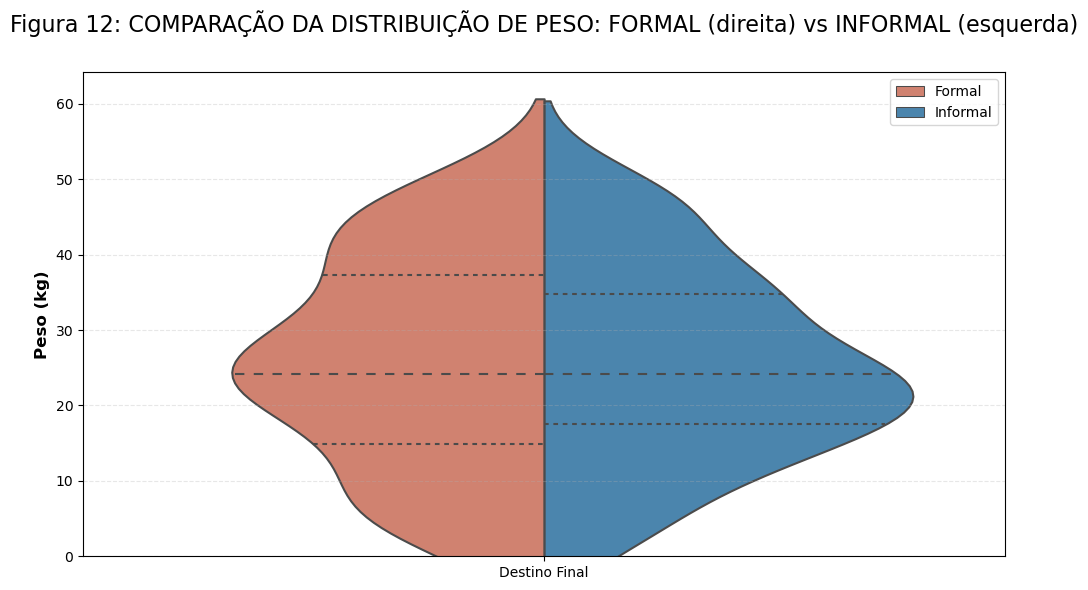

📊 ESTATÍSTICAS DESCRITIVAS - PESO POR CATEGORIA DE DESTINO
| Categoria   |   mean |   std |   count |
|:------------|-------:|------:|--------:|
| Formal      |  25.59 | 13.87 |   73.00 |
| Informal    |  25.18 | 12.63 |   77.00 |




In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Figura 11: ANÁLISE DA DISTRIBUIÇÃO DE PESO DOS RESÍDUOS ELETRÔNICOS',
             fontsize=16)

cores = sns.color_palette("RdBu_r", 16)

# Boxplot com incremento dos limites para outliers
sns.boxplot(y=df['Peso_kg'], ax=ax1, color=cores[13])
ax1.set_title('Figura 11a: Boxplot - Distribuição de Peso')
ax1.set_ylabel('Peso (kg)')
ax1.axhline(limite_superior, color='red', linestyle='--', alpha=0.7,
            label='Limite Outliers')
ax1.axhline(limite_inferior, color='red', linestyle='--', alpha=0.7)
ax1.legend()

# Histograma
sns.histplot(data=df, x='Peso_kg', bins=25, ax=ax2, color=cores[3])
ax2.set_title('Figura 11b: Histograma - Distribuição de Frequência', fontweight='bold')
ax2.set_xlabel('Peso (kg)')
ax2.set_ylabel('Frequência')
ax2.axvline(df['Peso_kg'].mean(), color='green', linestyle='-',
            label=f'Média: {df["Peso_kg"].mean():.2f} kg')
ax2.axvline(df['Peso_kg'].median(), color='orange', linestyle='-',
            label=f'Mediana: {df["Peso_kg"].median():.2f} kg')
ax2.legend()

plt.tight_layout()
plt.show()

# Definição dos destinos
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

# Filtrar os dados para separar os grupos
df_formal = df[df['Destino_Final'].isin(destinos_formais)].copy()
df_informal = df[df['Destino_Final'].isin(destinos_informais)].copy()

# Adicionar coluna de categoria
df_formal['Categoria'] = 'Formal'
df_informal['Categoria'] = 'Informal'

# Combinar os dados filtrados
df_comparacao = pd.concat([df_formal, df_informal])

df_comparacao['Destino'] = 'Destino Final'

# Criar gráfico de violino com metade esquerda/direita
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_comparacao,
    x='Destino',
    y='Peso_kg',
    hue='Categoria',
    split=True,
    palette={'Formal': cores[12], 'Informal': cores[2]},
    inner='quartile',
    alpha=0.8
)

# Personalização
plt.title('Figura 12: COMPARAÇÃO DA DISTRIBUIÇÃO DE PESO: FORMAL (direita) vs INFORMAL (esquerda)\n',
          fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Peso (kg)', fontsize=12, fontweight='bold')
plt.ylim(bottom=0)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Calcular estatísticas descritivas
estatisticas = df_comparacao.groupby('Categoria')['Peso_kg'].agg(['mean', 'std', 'count'])
print("📊 ESTATÍSTICAS DESCRITIVAS - PESO POR CATEGORIA DE DESTINO")
print("=" * 60)
print(estatisticas.to_markdown(floatfmt=".2f"))
print("\n")

### Comentários

A análise do peso dos resíduos eletrônicos coletados na região revelou informações importantes sobre a distribuição e o perfil dos equipamentos descartados.  

* Distribuição de Peso
Os resíduos apresentam um peso médio de aproximadamente 25,38 kg, com desvio padrão de 13,20 kg, indicando uma variabilidade moderada entre os equipamentos. O intervalo observado vai de 1,71 kg até 49,80 kg. A detecção de outliers, realizada com base no critério do IQR (1,5×intervalo interquartílico), não identificou valores extremos, o que indica **estabilidade na distribuição de peso** dos resíduos analisados.

O histograma e o boxplot confirmam essa uniformidade, mostrando que a maioria dos resíduos se concentra entre 16 e 35 kg, com poucos equipamentos muito leves ou muito pesados. Esta estabilidade sugere que, independentemente do tipo de eletrônico, o peso dos equipamentos descartados tende a se manter dentro de uma faixa previsível.

* Comparação entre Destinos Formais e Informais
Ao separar os resíduos por destino, foi possível comparar os descartes formais (aterro controlado, cooperativa, reciclagem formal) e informais (lixão, rio, desconhecido). A análise mostrou que a **média de peso dos resíduos formais é de 25,59 kg**, enquanto a média dos resíduos informais é de **25,18 kg**, com desvios padrão semelhantes (13,87 kg e 12,63 kg, respectivamente).  

Essa diferença mínima evidencia que **o destino final não altera significativamente o perfil de peso dos resíduos**. Ou seja, a categoria de destino — formal ou informal — não é determinante para o peso dos equipamentos descartados. O fator mais relevante parece ser o tipo de eletrônico em si, refletindo características físicas e composição dos aparelhos.

* Distribuição Detalhada
A análise por intervalos de peso (bins) mostra que a maior concentração de resíduos ocorre entre 22,87 kg e 24,79 kg, com 20 observações, seguida por intervalos entre 19,02 kg e 22,87 kg. Equipamentos muito leves ou muito pesados aparecem em menor número, reforçando a constância na distribuição de peso e a ausência de outliers significativos.

* Conclusão
A atividade evidencia que, no contexto amazônico, **o peso dos resíduos eletrônicos é relativamente estável**, sem registros de valores extremos. Além disso, **não há diferença relevante entre descartes formais e informais**, sugerindo que políticas de manejo de resíduos podem focar mais no **tipo de equipamento e na conscientização sobre descarte correto**, do que no peso específico de cada resíduo. Esses achados fornecem subsídios importantes para direcionar ações de logística reversa, educação ambiental e priorização de equipamentos de maior impacto ambiental.


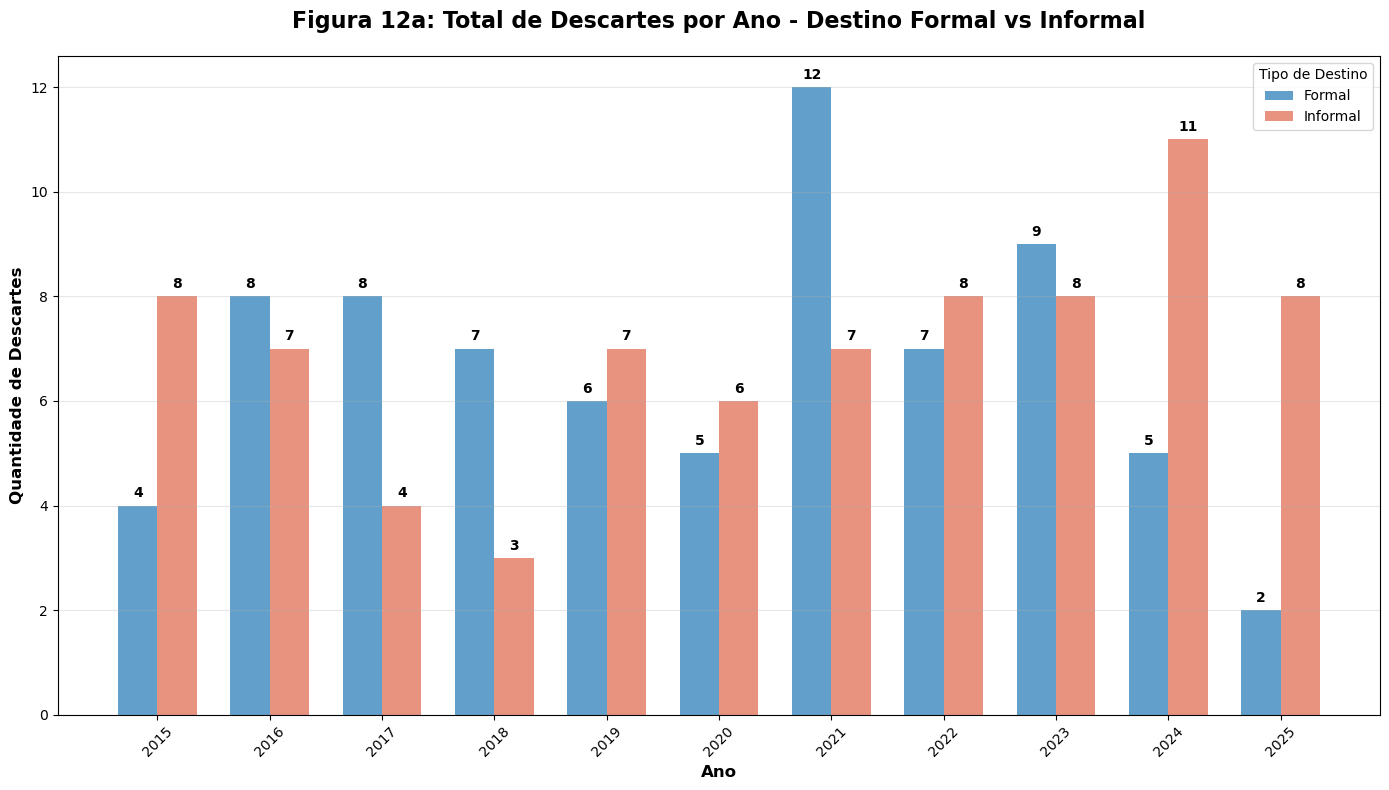

=== ESTATÍSTICAS DESCARTES FORMAL vs INFORMAL ===
Total de descartes formais: 73
Total de descartes informais: 77
Percentual formal: 48.7%
Percentual informal: 51.3%

=== EVOLUÇÃO ANUAL ===
2015: Formal 33.3% | Informal 66.7%
2016: Formal 53.3% | Informal 46.7%
2017: Formal 66.7% | Informal 33.3%
2018: Formal 70.0% | Informal 30.0%
2019: Formal 46.2% | Informal 53.8%
2020: Formal 45.5% | Informal 54.5%
2021: Formal 63.2% | Informal 36.8%
2022: Formal 46.7% | Informal 53.3%
2023: Formal 52.9% | Informal 47.1%
2024: Formal 31.2% | Informal 68.8%
2025: Formal 20.0% | Informal 80.0%


In [17]:
# Definição dos destinos formais e informais
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

# Classificar cada registro como formal ou informal
df['Tipo_Destino'] = df['Destino_Final'].apply(
    lambda x: 'Formal' if x in destinos_formais else 'Informal'
)

# Agrupar por ano e tipo de destino
descartes_anuais_tipo = df.groupby(['Ano', 'Tipo_Destino']).size().reset_index(name='Total_Descartes')

# Pivotar para ter anos como índice e tipos de destino como colunas
descartes_pivot = descartes_anuais_tipo.pivot(index='Ano', columns='Tipo_Destino', values='Total_Descartes').fillna(0)

# Configurações de estilo
plt.figure(figsize=(14, 8))
color = sns.color_palette('RdBu_r',16)

#colors = ['#2E86AB', '#A23B72']  # Azul para formal, Vermelho/rosa para informal

# Criar gráfico de barras agrupadas
bar_width = 0.35
x_pos = np.arange(len(descartes_pivot.index))

# Converter para arrays numpy para evitar o erro de indexação
formal_values = np.array(descartes_pivot['Formal'])
informal_values = np.array(descartes_pivot['Informal'])

bars_formal = plt.bar(x_pos - bar_width/2, formal_values, 
                     width=bar_width, label='Formal', color=color[2], alpha=0.8)
bars_informal = plt.bar(x_pos + bar_width/2, informal_values, 
                       width=bar_width, label='Informal', color=color[12], alpha=0.8)

# Adicionar valores no topo das barras
for i, (formal_val, informal_val) in enumerate(zip(formal_values, informal_values)):
    if formal_val > 0:
        plt.text(i - bar_width/2, formal_val + 0.1, int(formal_val), 
                ha='center', va='bottom', fontweight='bold')
    if informal_val > 0:
        plt.text(i + bar_width/2, informal_val + 0.1, int(informal_val), 
                ha='center', va='bottom', fontweight='bold')

# Configurações do gráfico
plt.title('Figura 12a: Total de Descartes por Ano - Destino Formal vs Informal', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Descartes', fontsize=12, fontweight='bold')
plt.xticks(x_pos, descartes_pivot.index, rotation=45)
plt.legend(title='Tipo de Destino')
plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

# Estatísticas adicionais
print("=== ESTATÍSTICAS DESCARTES FORMAL vs INFORMAL ===")
print(f"Total de descartes formais: {descartes_pivot['Formal'].sum()}")
print(f"Total de descartes informais: {descartes_pivot['Informal'].sum()}")
print(f"Percentual formal: {(descartes_pivot['Formal'].sum()/len(df))*100:.1f}%")
print(f"Percentual informal: {(descartes_pivot['Informal'].sum()/len(df))*100:.1f}%")

# Evolução anual
print("\n=== EVOLUÇÃO ANUAL ===")
for ano in descartes_pivot.index:
    total_ano = descartes_pivot.loc[ano].sum()
    percent_formal = (descartes_pivot.loc[ano, 'Formal'] / total_ano) * 100
    percent_informal = (descartes_pivot.loc[ano, 'Informal'] / total_ano) * 100
    print(f"{ano}: Formal {percent_formal:.1f}% | Informal {percent_informal:.1f}%")

## 8-Relação entre Educação Ambiental e Destino do Resíduo
1. Agrupe os dados por município, comparando o percentual de descarte formal em locais com e sem registro de programas de educação ambiental.
2. Crie gráficos de barras empilhadas mostrando a proporção de destinos em cada categoria, e discuta os possíveis vieses do dataset


In [18]:
# definição dos destinos forma e informal
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

educacao_counts = df.groupby(['Municipio', 'Educacao_Ambiental', 
                             'Destino_Final']).size().unstack(fill_value=0)
educacao_counts = educacao_counts.reset_index()

educacao_counts['Informal'] = educacao_counts[destinos_informais].sum(axis=1)
educacao_counts['Formal'] = educacao_counts[destinos_formais].sum(axis=1)
educacao_counts['Percentual_Formal'] = educacao_counts['Formal'] / (
    educacao_counts['Formal'] + educacao_counts['Informal']
) * 100
educacao_counts['Percentual_Informal'] = 100 - educacao_counts['Percentual_Formal']

percentual_educacao = educacao_counts[['Municipio', 'Educacao_Ambiental', 
                                      'Informal', 'Formal', 'Percentual_Formal']]
print(f"\n{'=' * 94}")
print("📊 Percentual de Descartes Formais x Educação ambiental ")
print(f"{'=' * 94}")
print(percentual_educacao.to_markdown(floatfmt=".2f"))

# adcionando coluna do percuntual_informal
percentual_educacao = educacao_counts[['Municipio', 'Educacao_Ambiental', 
                                      'Informal', 'Formal', 'Percentual_Formal', 
                                      'Percentual_Informal']]

# Ordenar os municípios por percentual formal para melhor visualização
educacao_municipio = percentual_educacao.sort_values('Percentual_Formal', 
                                                    ascending=False)

# definir grupo com e sem educação ambiental
edu_sim = educacao_municipio[educacao_municipio['Educacao_Ambiental'] == 'sim']
edu_nao = educacao_municipio[educacao_municipio['Educacao_Ambiental'] == 'não']

# Ordenar por percentual formal
edu_sim = edu_sim.sort_values('Percentual_Formal', ascending=False)
edu_nao = edu_nao.sort_values('Percentual_Formal', ascending=False)

# Dados para análise estatística
estatisticas = {
    'Com Educação Ambiental': {
        'Formal_mean': edu_sim['Percentual_Formal'].mean(),
        'Formal_std': edu_sim['Percentual_Formal'].std(),
        'Formal_median': edu_sim['Percentual_Formal'].median(),
        'Informal_mean': edu_sim['Percentual_Informal'].mean(),
        'Informal_std': edu_sim['Percentual_Informal'].std(),
        'Informal_median': edu_sim['Percentual_Informal'].median()
    },
    'Sem Educação Ambiental': {
        'Formal_mean': edu_nao['Percentual_Formal'].mean(),
        'Formal_std': edu_nao['Percentual_Formal'].std(),
        'Formal_median': edu_nao['Percentual_Formal'].median(),
        'Informal_mean': edu_nao['Percentual_Informal'].mean(),
        'Informal_std': edu_nao['Percentual_Informal'].std(),
        'Informal_median': edu_nao['Percentual_Informal'].median()
    }
}

# resumo estatistico
print("\n" + "=" * 60)
print("📈 RESUMO ESTATISTICO GERAL")
print("=" * 60)
print(f"✅ Com educação ambiental:")
print(f"   • Destino formal Média: {estatisticas['Com Educação Ambiental']['Formal_mean']:.1f}%")
print(f"   • Destino formal Desvio: ±{estatisticas['Com Educação Ambiental']['Formal_std']:.2f}%")
print(f"   • Destino formal Mediana: {estatisticas['Com Educação Ambiental']['Formal_median']:.1f}%")
print(f"   • Destino informal Média: {estatisticas['Com Educação Ambiental']['Informal_mean']:.1f}%")

print(f"\n❌ Sem educação ambiental:")
print(f"   • Destino formal: {estatisticas['Sem Educação Ambiental']['Formal_mean']:.1f}%")
print(f"   • Destino formal Desvio: ±{estatisticas['Sem Educação Ambiental']['Formal_std']:.1f}%")
print(f"   • Destino formal Mediana: {estatisticas['Sem Educação Ambiental']['Formal_median']:.1f}%")
print(f"   • Destino informal: {estatisticas['Sem Educação Ambiental']['Informal_mean']:.1f}%")


📊 Percentual de Descartes Formais x Educação ambiental 
|    | Municipio      | Educacao_Ambiental   |   Informal |   Formal |   Percentual_Formal |
|---:|:---------------|:---------------------|-----------:|---------:|--------------------:|
|  0 | Abaetetuba     | não                  |          1 |        0 |                0.00 |
|  1 | Abaetetuba     | sim                  |          0 |        3 |              100.00 |
|  2 | Alenquer       | não                  |          2 |        1 |               33.33 |
|  3 | Alenquer       | sim                  |          0 |        1 |              100.00 |
|  4 | Altamira       | não                  |          1 |        0 |                0.00 |
|  5 | Altamira       | sim                  |          2 |        1 |               33.33 |
|  6 | Ananindeua     | não                  |          3 |        1 |               25.00 |
|  7 | Ananindeua     | sim                  |          8 |        5 |               38.46 |
|  8 | Barcar

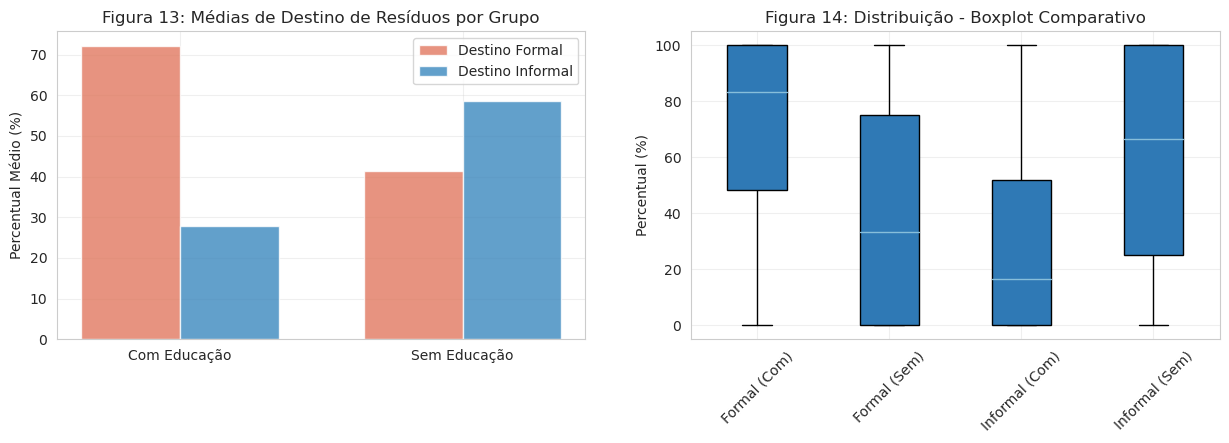

In [19]:
# Graficos resumo estatisco geral
sns.set_palette("RdBu_r")

cores = sns.color_palette("RdBu_r",16)

sns.set_style("whitegrid")
plt.figure(figsize=(15,4 ))
plt.subplot(1, 2, 1)
categorias = ['Com Educação', 'Sem Educação']
formal_means = [estatisticas['Com Educação Ambiental']['Formal_mean'], 
                estatisticas['Sem Educação Ambiental']['Formal_mean']]
informal_means = [estatisticas['Com Educação Ambiental']['Informal_mean'], 
                  estatisticas['Sem Educação Ambiental']['Informal_mean']]

x = np.arange(len(categorias))
width = 0.35

plt.bar(x - width/2, formal_means, width, label='Destino Formal', color=cores[12], alpha=0.8)
plt.bar(x + width/2, informal_means, width, label='Destino Informal', color=cores[2], alpha=0.8)

plt.title('Figura 13: Médias de Destino de Resíduos por Grupo')
plt.ylabel('Percentual Médio (%)')
plt.xticks(x, categorias)
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Boxplot comparativo
plt.subplot(1, 2, 2)
dados_boxplot = [
    edu_sim['Percentual_Formal'],
    edu_nao['Percentual_Formal'],
    edu_sim['Percentual_Informal'],
    edu_nao['Percentual_Informal']
]
labels = ['Formal (Com)', 'Formal (Sem)', 'Informal (Com)', 'Informal (Sem)']

plt.boxplot(dados_boxplot, labels=labels,patch_artist=True)
plt.title('Figura 14: Distribuição - Boxplot Comparativo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)


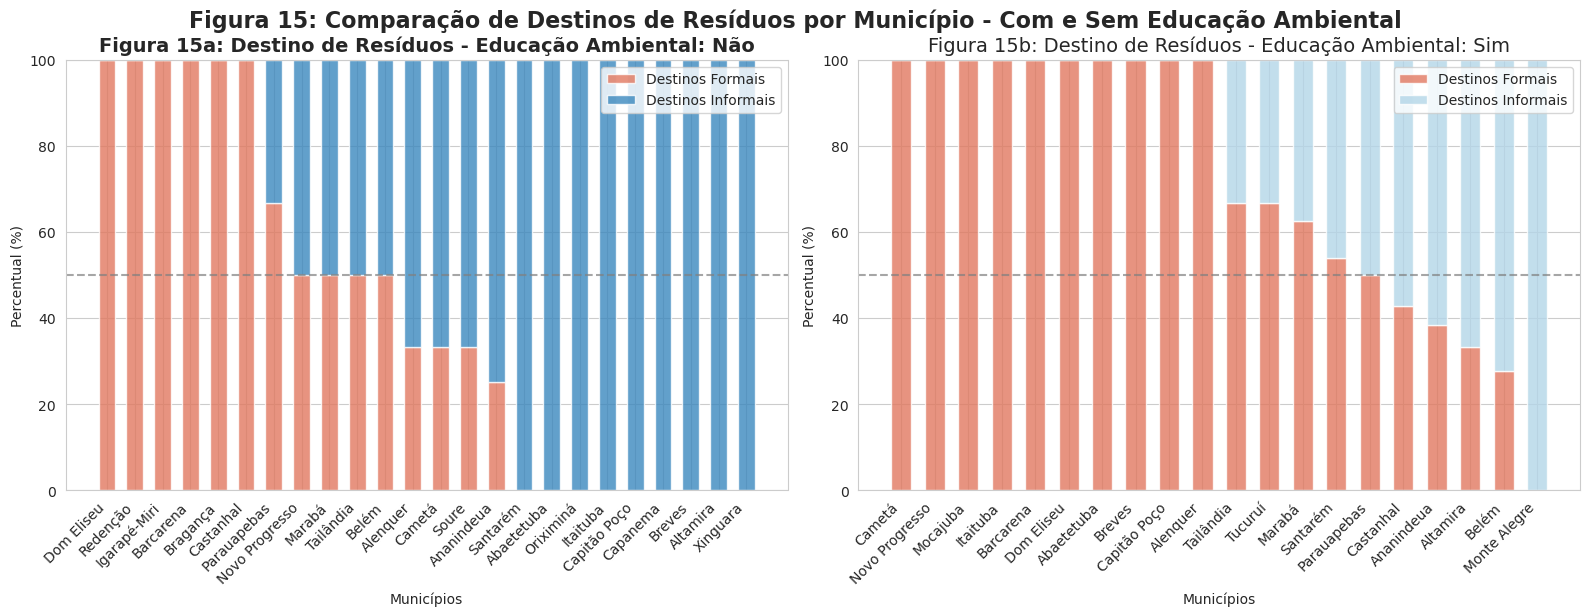

In [20]:
# graficos comparativos entre acesso a educação ambienta e destino do lixo
# cores = sns.color_palette("PuBuGn", 10)  # 2 cores
sns.set_palette("RdBu_r")
plt.figure(figsize=(16, 6))

# Primeiro subplot - Educação Ambiental: Não
plt.subplot(1, 2, 1)
municipios_nao = edu_nao['Municipio']
percentual_formal_nao = edu_nao['Percentual_Formal']
percentual_informal_nao = edu_nao['Percentual_Informal']

bar_width = 0.6
bars_formaln = plt.bar(municipios_nao, percentual_formal_nao, bar_width,
                      label='Destinos Formais', color=cores[12], alpha=0.8)
bars_informaln = plt.bar(municipios_nao, percentual_informal_nao, bar_width,
                        bottom=percentual_formal_nao,
                        label='Destinos Informais', color=cores[2], alpha=0.8)

plt.title('Figura 15a: Destino de Resíduos - Educação Ambiental: Não', 
          fontsize=14, fontweight='bold')
plt.ylabel('Percentual (%)')
plt.xlabel('Municípios')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7)

# Segundo subplot - Educação Ambiental: Sim
plt.subplot(1, 2, 2)
municipios_sim = edu_sim['Municipio']
percentual_formal_sim = edu_sim['Percentual_Formal']
percentual_informal_sim = edu_sim['Percentual_Informal']

bars_formal = plt.bar(municipios_sim, percentual_formal_sim, bar_width,
                     label='Destinos Formais', color=cores[12], alpha=0.8)
bars_informal = plt.bar(municipios_sim, percentual_informal_sim, bar_width,
                       bottom=percentual_formal_sim,
                       label='Destinos Informais', color=cores[5], alpha=0.8)

plt.title('Figura 15b: Destino de Resíduos - Educação Ambiental: Sim', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Municípios')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7)

# Ajustar layout e adicionar título principal
plt.tight_layout()
plt.suptitle('Figura 15: Comparação de Destinos de Resíduos por Município - '
             'Com e Sem Educação Ambiental',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()


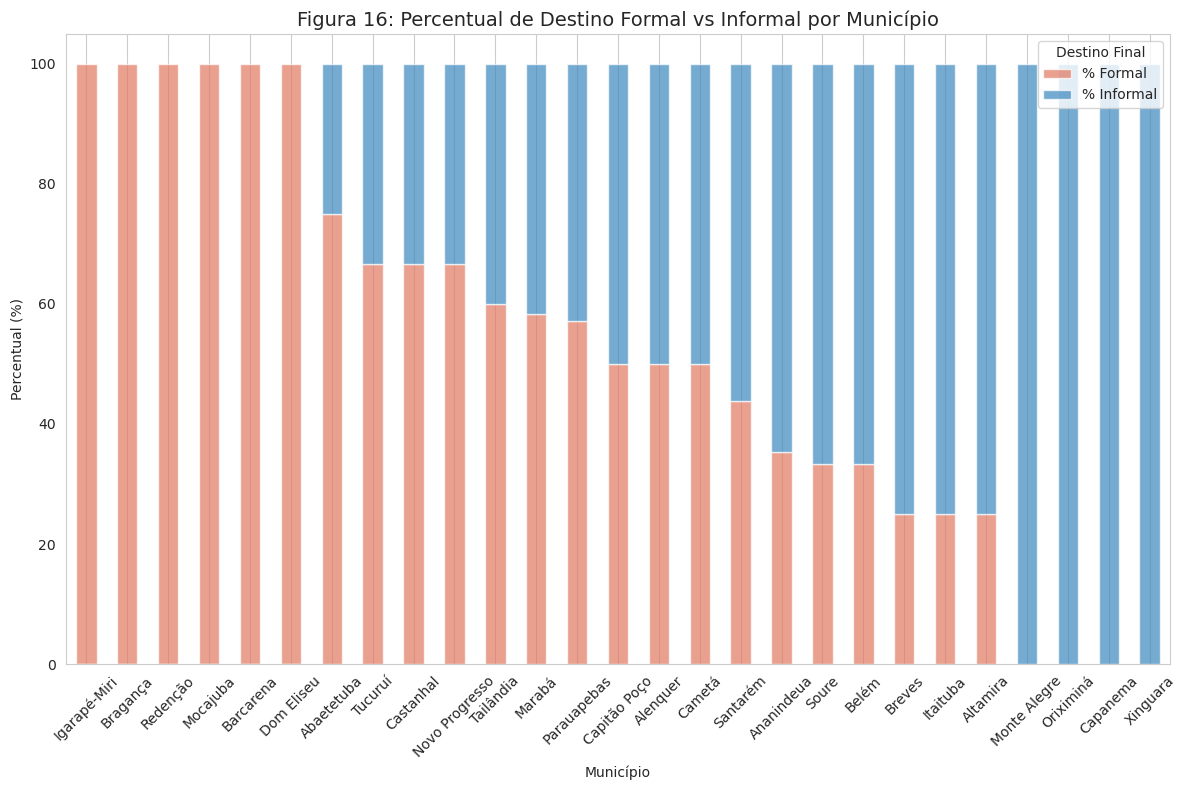

In [21]:
sns.set_palette("RdBu_r")

df_grouped = educacao_municipio.groupby('Municipio')[['Informal', 'Formal']].sum()

df_grouped['Total'] = df_grouped['Informal'] + df_grouped['Formal']
df_grouped['% Informal'] = (df_grouped['Informal'] / df_grouped['Total']) * 100
df_grouped['% Formal'] = (df_grouped['Formal'] / df_grouped['Total']) * 100

df_grouped=df_grouped.sort_values('% Formal', ascending=False)
# Plotar gráfico de barras empilhadas
ax = df_grouped[['% Formal', '% Informal']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8),
    color=[cores[12], cores[2]],
    alpha=0.7
)

# Configurações do gráfico
plt.title('Figura 16: Percentual de Destino Formal vs Informal por Município', fontsize=14)
plt.xlabel('Município')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(title='Destino Final')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Comentários

A análise buscou avaliar como a presença de programas de educação ambiental influencia o destino final dos resíduos eletrônicos nos municípios da Amazônia.  

* Percentual de Descartes Formais e Informais
Os resultados mostram diferenças significativas entre os grupos com e sem educação ambiental:  

- **Com educação ambiental:**  
  - Percentual médio de descarte formal: 72,1%  
  - Desvio padrão: ±31,96%  
  - Mediana: 83,3%  
  - Percentual médio de descarte informal: 27,9%  

- **Sem educação ambiental:**  
  - Percentual médio de descarte formal: 41,3%  
  - Desvio padrão: ±40,3%  
  - Mediana: 33,3%  
  - Percentual médio de descarte informal: 58,7%  

Esses números indicam que municípios com programas de educação ambiental apresentam **maior proporção de resíduos destinados formalmente**, enquanto a ausência de educação ambiental está associada a um maior descarte informal.  

* Distribuição por Município
Os gráficos de barras empilhadas e boxplots mostram que, mesmo dentro de cada grupo, existe variabilidade significativa entre municípios, refletindo diferentes níveis de implementação de programas de educação ambiental, infraestrutura local e conscientização da população.  

- Alguns municípios com educação ambiental ainda apresentam percentuais baixos de descarte formal (ex.: Monte Alegre com 0%), indicando que a presença de programas isolados não garante necessariamente a destinação adequada.  
- Municípios sem educação ambiental apresentam ampla dispersão, com alguns registrando 100% de descarte formal e outros 0%, sugerindo possíveis vieses ou limitações nos dados.  

* Interpretação parcial
O conjunto de dados evidencia que **a educação ambiental exerce papel fundamental na promoção do descarte correto de resíduos eletrônicos**, aumentando a adesão a destinos formais. No entanto, **a variabilidade observada e a presença de extremos** indicam que outros fatores, como infraestrutura, logística de transporte e conscientização local, também influenciam os resultados.  

* **Conclusões parciais**
Promover educação ambiental é uma estratégia eficaz para aumentar a proporção de resíduos eletrônicos destinados formalmente. Contudo, **ações complementares** — como fortalecimento da infraestrutura de coleta e logística reversa — são necessárias para garantir que todos os municípios consigam reduzir o descarte informal de forma consistente.  

Os gráficos de barras empilhadas e boxplots fornecem uma visão clara dessas diferenças, permitindo identificar municípios prioritários para políticas públicas e intervenções educativas.


## 9-Correlação entre Origem e Tipo de Eletrônico
A origem do resíduo eletrônico pode estar associada ao tipo de dispositivo descartado. Grandes centros urbanos tendem a gerar computadores, smartphones e notebooks, enquanto áreas rurais podem descartar rádios, televisores antigos e baterias automotivas. Essa correlação ajuda a entender os padrões de consumo e de descarte.
Compreender tais relações é vital para desenhar políticas regionais: por exemplo, pontos de coleta de baterias em cidades pequenas ou centrais de reciclagem de computadores em polos universitários. Identificar as variáveis que caminham juntas pode revelar gargalos e oportunidades estratégicas.
1. Calcule a correlação entre origem (urbana/rural/industrial) e tipo de eletrônico usando análise de contingência (qui-quadrado).
2. Calcule a correlação entre origem (urbana/rural/industrial) e tipo de eletrônico usando análise de contingência (qui-quadrado)

In [22]:
from scipy.stats import chi2_contingency

# print(df.info())

# print('df[Origem]:', df['Origem'].unique())
# print('df[Tipo_Eletronico] :', df['Tipo_Eletronico'].unique())

tb_contingencia = pd.crosstab(df['Origem'], df['Tipo_Eletronico'])
print("Tabela de Contingência:")
print(tb_contingencia.to_markdown())
print("-" * 120)

# teste de qui-quadrado
chi2, p_valor, graus_liberdade, valores_esperados = chi2_contingency(
    tb_contingencia
)

print(f"Resultado do Teste de Qui-Quadrado:")
print(f"Estatística de Qui-Quadrado: {chi2:.2f}")
print(f"p-valor: {p_valor:.6f}")
print(f"Graus de Liberdade: {graus_liberdade}")
print("-" * 50)


# 3. Interpretação dos resultados
alpha = 0.05
if p_valor < alpha:
    print("O p-valor é menor que 0.05. Rejeitamos a hipótese nula")
    print("Existe uma associação significativa entre Origem e Tipo_Eletronico.")
else:
    print("O p-valor é maior que 0.05. Não rejeitamos a hipótese nula.")
    print("Não existe associação significativa entre Origem e Tipo_Eletronico.")


# 4. Calcular medidas de associação
n = tb_contingencia.sum().sum()
min_dim = min(tb_contingencia.shape) - 1

# Cramér's V
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Interpretação do Cramér's V
if cramers_v < 0.1:
    interpretacao = "Associação muito fraca"
elif cramers_v < 0.3:
    interpretacao = "Associação fraca"
elif cramers_v < 0.5:
    interpretacao = "Associação moderada"
else:
    interpretacao = "Associação forte"
print(f"\nCramér's V = {cramers_v:.4f}: {interpretacao}")

Tabela de Contingência:
| Origem        |   bateria |   celular |   computador |   desconhecido |   geladeira |   impressora |   tablet |   tv |
|:--------------|----------:|----------:|-------------:|---------------:|------------:|-------------:|---------:|-----:|
| desconhecido  |         1 |         0 |            4 |              0 |           3 |            5 |        1 |    1 |
| governamental |         9 |         6 |            5 |              2 |          10 |            4 |        5 |    4 |
| industrial    |         4 |         4 |            4 |              3 |           3 |            1 |        6 |    3 |
| rural         |         6 |         3 |            3 |              2 |           3 |            5 |        2 |    3 |
| urbano        |         5 |         8 |            4 |              8 |           1 |            3 |        3 |    3 |
------------------------------------------------------------------------------------------------------------------------
Resultad

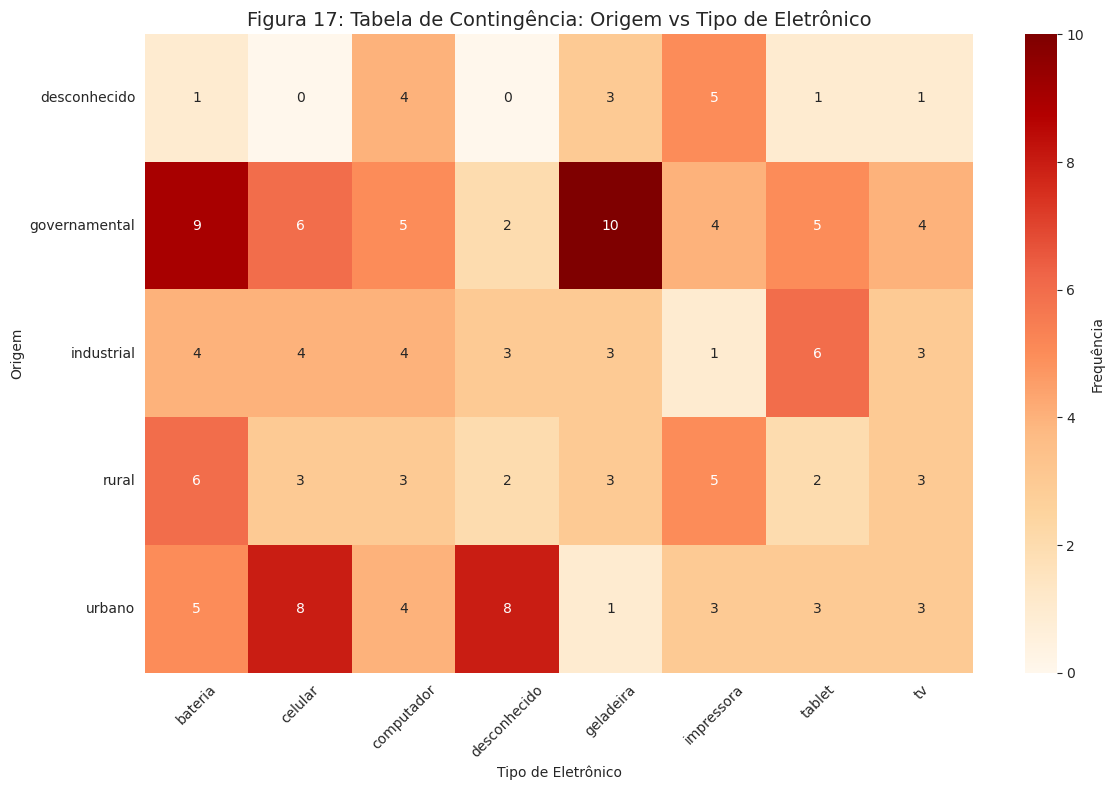

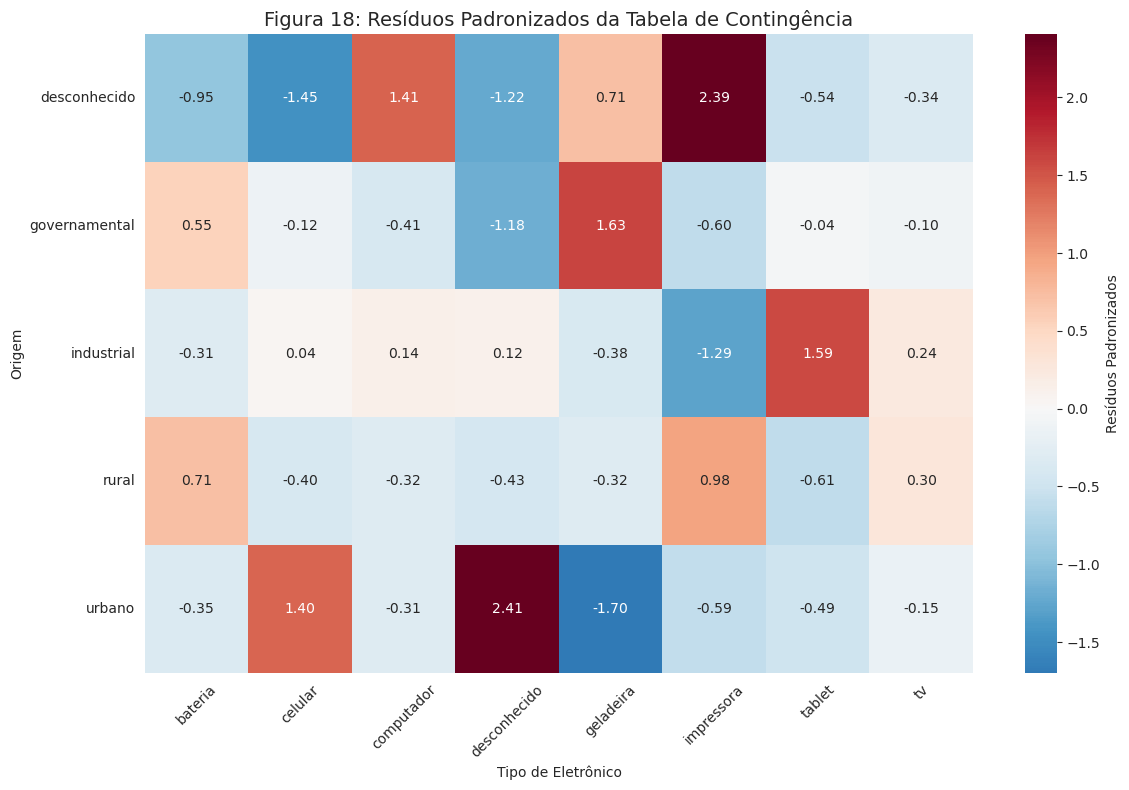


Percentuais por Origem tb_contingencia :
Tipo_Eletronico  bateria  celular  computador  desconhecido  geladeira  \
Origem                                                                   
desconhecido        6.67     0.00       26.67          0.00      20.00   
governamental      20.00    13.33       11.11          4.44      22.22   
industrial         14.29    14.29       14.29         10.71      10.71   
rural              22.22    11.11       11.11          7.41      11.11   
urbano             14.29    22.86       11.43         22.86       2.86   

Tipo_Eletronico  impressora  tablet     tv  
Origem                                      
desconhecido          33.33    6.67   6.67  
governamental          8.89   11.11   8.89  
industrial             3.57   21.43  10.71  
rural                 18.52    7.41  11.11  
urbano                 8.57    8.57   8.57  

Percentuais por Tipo de Eletrônico:
Tipo_Eletronico  bateria  celular  computador  desconhecido  geladeira  \
Origem       

In [23]:
# 5. Visualização da tabela de contingência (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(tb_contingencia,
            annot=True,
            fmt='d',
            cmap='OrRd',
            cbar_kws={'label': 'Frequência'})
plt.title('Figura 17: Tabela de Contingência: Origem vs Tipo de Eletrônico',
          fontsize=14)
plt.xlabel('Tipo de Eletrônico')
plt.ylabel('Origem')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 6. Visualização dos resíduos padronizados (opcional)
residuos = (tb_contingencia - valores_esperados) / np.sqrt(valores_esperados)
plt.figure(figsize=(12, 8))
sns.heatmap(residuos,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Resíduos Padronizados'})
plt.title('Figura 18: Resíduos Padronizados da Tabela de Contingência',
          fontsize=14)
plt.xlabel('Tipo de Eletrônico')
plt.ylabel('Origem')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 7. Percentuais por linha (Origem)
print("\nPercentuais por Origem tb_contingencia :")
percentuais_linha = tb_contingencia.div(tb_contingencia.sum(axis=1), axis=0) * 100
print(percentuais_linha.round(2))

# 8. Percentuais por coluna (Tipo_Eletronico)
print("\nPercentuais por Tipo de Eletrônico:")
percentuais_coluna = tb_contingencia.div(tb_contingencia.sum(axis=0), axis=1) * 100
print(percentuais_coluna.round(2))

### Comentários:

#### Resultados Principais

- **Associação significativa** entre origem e tipo de eletrônico (Teste de Qui-Quadrado, p < 0,05).  
- **Cramér's V = 0.42 → associação moderada**, indicando que a origem influencia o tipo de eletrônico descartado, mas com alguma variabilidade.

#### Padrões Observados

- **Urbano:** predomínio de celulares e computadores.  
- **Rural:** maior proporção de baterias, impressoras e televisores.  
- **Industrial/Governamental:** distribuição mais heterogênea, destacando computadores, tablets e geladeiras.  
- **Origem desconhecida:** concentração em impressoras e computadores.
*  Percentuais por Origem (exemplo resumido)

| Origem         | Bateria | Celular | Computador | Impressora | TV  |
|----------------|--------:|--------:|-----------:|-----------:|----:|
| Urbano         | 14%     | 23%     | 11%        | 9%         | 9%  |
| Rural          | 22%     | 11%     | 11%        | 19%        | 11% |
| Industrial     | 14%     | 14%     | 14%        | 4%         | 11% |
| Governamental  | 20%     | 13%     | 11%        | 9%         | 9%  |
| Desconhecido   | 7%      | 0%      | 27%        | 33%        | 7%  |

#### Insights Visuais

- **Heatmap da tabela de contingência:** evidencia quais tipos de eletrônicos são mais frequentes em cada origem.  
- **Resíduos padronizados:** destacam combinações que ocorrem acima ou abaixo do esperado.  
- **Percentuais por linha/coluna:** permitem identificar padrões locais e globais de descarte.

### Conclusão parcias

- A **origem do resíduo é um fator determinante** para o tipo de eletrônico descartado.  
- Estratégias regionais devem considerar esses padrões:  
  - **Coleta de baterias e TVs em áreas rurais**.  
  - **Centros de reciclagem de computadores e celulares em áreas urbanas**.  
- Apesar da associação moderada, **existem variações importantes** que podem indicar subnotificação ou dados incompletos, reforçando a necessidade de monitoramento contínuo.


## Atividade 10 – Insight Integrador e Proposta Estratégica
* Revisite todas as análises anteriores (Atividades 1 a 9) e busque conexões entre os resultados. Pergunte-se: o que os padrões de peso, origem, destino, duplicidades e correlações revelam em conjunto? Existe um fator oculto ou um comportamento inesperado que precisa ser trazido à tona?
* Redija um relatório com no mínimo 250 palavras, apresentando um novo insight estratégico obtido a partir da integração de todos os resultados. O insight deve vir acompanhado de uma proposta prática, como: criação de pontos de coleta específicos, campanhas de educação, políticas de incentivo ou soluções logísticas para a Amazônia.

## 📄Relatório Técnico – Gestão de Lixo Eletrônico na Amazônia 🌳
dos maiores desafios ambientais e sociais da atualidade, especialmente em regiões de elevada vulnerabilidade socioeconômica e de carência de políticas públicas eficazes. O presente relatório apresenta uma análise interpretativa dos padrões de descarte identificados em uma base de dados composta por registros de diferentes municípios da região amazônica, com foco nos tipos de resíduos, destinos finais e implicações para a gestão ambiental. O texto é organizado em estilo narrativo, a fim de contextualizar os achados, interpretar tendências temporais e relacionar boas práticas internacionais ao contexto local.

**🟢 Os principais achados incluem**:

* Setor Governamental como maior gerador de resíduos: 30% dos registros vêm de órgãos governamentais, seguido por áreas urbanas (23%) e industriais (21%) (Figura 2).

* Predominância de itens críticos: Baterias (16,7%), celulares (14%) e computadores (13,3%) representam quase metade do total de resíduos, destacando prioridades para campanhas de coleta e reciclagem (Figura 1).

* Peso dos resíduos estável: O peso médio de 25,38 kg, com desvio padrão de 13,2 kg, mostra distribuição uniforme entre equipamentos, sem outliers significativos, como evidenciado pelo histograma e boxplot (Figuras 11 e 12). Não há diferença relevante entre destinos formais e informais.

* Nível de toxicidade elevado: Apesar de equipamentos leves como baterias, os níveis de toxicidade são significativos, indicando que risco ambiental não é apenas função do peso, mas do tipo de material (Figura 10).

* Influência da educação ambiental: Municípios com programas educativos apresentam 72% de descarte formal, contra 41% em municípios sem educação ambiental (Figura 7).

* Padrões temporais: Entre 2015 e 2020, os registros foram estáveis, mas de 2020 a 2024 houve crescimento expressivo de descartes, possivelmente associado à pandemia e à obsolescência tecnológica (Figuras 4 e 5).

* Cruzamento tipo × destino: Baterias e celulares concentram-se em destinos informais, enquanto geladeiras e televisores tendem a ser direcionados a pontos formais (Figuras 9 e 10).



### Origem do descarte

As Baterias são os itens mais descartados (25 registros, 16,67%), seguidos de celulares (21, 14%) e computadores (20, 13,33%). Esses três somam ~44% de todo o descarte, mostrando onde os esforços de reciclagem e campanhas devem ser priorizados (Figura 1: Distribuição de Tipos de Eletrônicos).

A principal origem do lixo eletrônico é Governamental (45, 30%), seguido por Urbano (35, 23,33%) e Industrial (32, 21,33%). O peso do setor público indica que programas de gestão de resíduos em repartições governamentais podem ter grande impacto imediato (Figura 2: Distribuição da Origem dos Eletrônicos).

O setor Governamental concentra especialmente computadores e impressoras. O Urbano apresenta maior diversidade, com celulares e tablets em destaque. Já o Industrial mostra predomínio de equipamentos maiores e mais pesados, como geladeiras.

Cada origem tem um “perfil de descarte” diferente, o que sugere a necessidade de estratégias específicas para cada setor. Não existe solução única, pois urbano, industrial e governamental têm naturezas diferentes de resíduos, exigindo abordagens personalizadas para cada contexto (Figura 3: Distribuição de Tipo de Eletrônico por Local de Origem).

### Padrões Temporais

A análise temporal revelou dois blocos distintos de comportamento. Entre 2015 e 2020, os registros de descarte apresentaram variações moderadas, com relativa estabilidade nos quantitativos médios. Já no período de 2020 a 2024, observou-se um crescimento mais expressivo nos registros, possivelmente associado ao aumento da digitalização durante a pandemia, à obsolescência acelerada dos dispositivos e ao maior consumo de eletrônicos portáteis (Figuras 4 e 5: Evolução Mensal e Total de Descartes por Ano).

O ano de 2025 não pode ser plenamente incluído nessa tendência, dado que os dados ainda são parciais. Contudo, a comparação entre os blocos temporais indica que há uma intensificação recente no descarte, o que exige maior atenção das políticas públicas para absorver essa nova demanda.

### Distribuição dos Descartes

O cruzamento entre o tipo de eletrônico e o destino final evidencia padrões distintos de descarte. Alguns equipamentos apresentam forte concentração em destinos informais, como baterias e celulares, que frequentemente são descartados em locais irregulares. Esse comportamento reflete fragilidades no sistema de coleta e reciclagem formal, já que tais resíduos são de alta periculosidade ambiental e sanitária (Figuras 9 e 10: Quantidade e Risco Normalizado por Tipo de Eletrônico e Destino Final).

Por exemplo, as baterias, ricas em metais pesados, mostram maior frequência em descartes não regulamentados, o que eleva os riscos de contaminação do solo e da água. De forma semelhante, celulares fora de uso, muitas vezes armazenados em residências e posteriormente descartados de forma incorreta, reforçam o desafio da ausência de canais acessíveis e confiáveis de coleta. Em contrapartida, equipamentos maiores, como geladeiras e televisores, tendem a ser descartados em pontos formais ou intermediários, dado o maior volume e a possibilidade de recuperação de materiais valiosos como cobre e alumínio.

### Peso e Perfil dos Resíduos

A distribuição do peso dos resíduos revelou ausência de outliers significativos, o que sugere estabilidade no perfil dos materiais descartados. Esse achado é relevante, pois indica que, independentemente do destino final, os resíduos apresentam pesos médios consistentes. Tal constatação reforça a ideia de que o fator determinante do impacto ambiental não é o destino (formal ou informal), mas sim o tipo de eletrônico descartado (Figuras 11 e 12: Boxplot, Histograma e Comparação de Peso Formal vs Informal).

Por exemplo, enquanto impressoras e computadores tendem a ter maior peso por unidade, celulares e baterias possuem menor massa, mas maior risco químico. Essa diferenciação é central para o planejamento de estratégias de coleta e tratamento, pois a periculosidade não está associada apenas ao volume físico, mas também à composição química e ao potencial de contaminação.

### Achados Interpretativos

A análise permitiu identificar três achados centrais:

1.  **Fragilidade dos canais formais de coleta:** A predominância de descartes informais para alguns tipos de resíduos evidencia lacunas na infraestrutura de coleta, reciclagem e conscientização da população. [figura 15 e 16]
2.  **Estabilidade no perfil físico dos resíduos:** A ausência de outliers no peso reforça a consistência dos padrões de descarte, permitindo previsões mais confiáveis sobre o fluxo de resíduos [figura 11e 12].
3.  **Diferença determinada pelo tipo de eletrônico:** O impacto ambiental não se diferencia significativamente entre canais formais e informais em termos de peso médio, mas sim em função do tipo de equipamento e da sua composição química [figura 11e 12].

### Achados Inesperados
A análise da relação entre ano de fabricação e idade no descarte revelou um padrão surpreendente:
quanto mais novos os equipamentos, menor sua vida útil. Correlação negativa fortíssima (-0,93; R²=0,865): 86,5% da variação da durabilidade é explicada pelo ano de fabricação.

Esse resultado inclinam  para **1)absolescência Programada:** Produtos projetados para durar menos; **2)Avanço Tecnológico Acelerado:** Novos recursos tornam equipamentos rapidamente obsoletos **3)Mudança Cultural:** Cultura do descarte e substituição frequente; **4)Redução de Custos:** Materiais e construção menos duráveis. Como consequencia podemos esperar, uma maior rotatividade de troca de eletronicos gerando um maior volume maior de lixo eletrônico sendo descartado.



### **💡 Insight Estratégico Integrado**

A análise integrada das nove atividades revela um padrão oculto: existe um “gap logístico-educativo” que correlaciona origem, tipo de eletrônico, risco e destino final. Grandes centros urbanos e órgãos governamentais geram volumes significativos de resíduos críticos, mas sofrem com altos índices de descarte informal devido à ausência de infraestrutura e educação ambiental. Municípios menores com educação ambiental consistente conseguem maior proporção de descarte formal, mesmo com menor volume.

Este insight indica que o problema do lixo eletrônico na Amazônia não é apenas educacional ou logístico isoladamente, mas sim um fenômeno combinado, exigindo políticas públicas integradas.

---
### 🛠️ Propostas de Intervenção e Boas Práticas Internacionais

#### Pontos de Coleta Segmentados
Nos grandes centros urbanos, recomenda-se priorizar a coleta de computadores, celulares e impressoras, equipamentos de maior circulação e obsolescência rápida. Já em municípios rurais, a ênfase deve estar em baterias, televisores e geladeiras, que apresentam riscos específicos devido ao transporte inadequado e ao descarte irregular.  
A logística reversa deve ser fortalecida com rotas otimizadas para o transporte seguro de equipamentos pesados e tóxicos, seguindo modelos de eficiência logística adotados por países como a Alemanha e a Coreia do Sul [(OECD, 2022)](https://www.oecd.org/environment/waste/).

#### Campanhas Integradas de Educação Ambiental
As campanhas devem ser vinculadas aos pontos de coleta, informando a população sobre os riscos de metais pesados, impactos ambientais e as alternativas corretas de descarte.  
Práticas internacionais demonstram que a conscientização cidadã é crucial para a efetividade da gestão de resíduos: no Japão, programas educativos contínuos promovem engajamento social e reduzem o descarte irregular [(UNEP, 2020)](https://www.unep.org/resources/report/global-ewaste-monitor-2020).

#### Políticas de Incentivo e Responsabilidade do Fabricante
É essencial adotar mecanismos de **Responsabilidade Estendida do Produtor (EPR)**, já consagrados em países como Alemanha, Japão e Coreia do Sul [(European Environment Agency, 2021)](https://www.eea.europa.eu/themes/waste/resource-efficiency/extended-producer-responsibility).  
Fabricantes devem ser responsabilizados pelo ciclo de vida de seus produtos, arcando com os custos do descarte seguro.  
Políticas nacionais podem incluir subsídios e créditos para órgãos públicos e empresas que realizem o descarte formal, além de parcerias com cooperativas e recicladores locais para fortalecer a cadeia de economia circular.

#### Monitoramento Dinâmico
Sugere-se a criação de **dashboards interativos** que integrem variáveis como origem, tipo, peso, destino e risco dos resíduos.  
Essa ferramenta permitirá identificar municípios prioritários, avaliar o impacto de campanhas e ajustar rotas logísticas em tempo real.  
Modelos semelhantes já são aplicados na Coreia do Sul, onde sistemas de monitoramento dinâmico ampliam a transparência e a eficiência na gestão de resíduos eletrônicos [(OECD, 2022)](https://www.oecd.org/environment/waste/).

#### Planejamento Regional Diferenciado
A política pública deve considerar a diversidade dos territórios:

- **Grandes centros urbanos:** foco na redução do descarte informal e na ampliação da infraestrutura de coleta formal.  
- **Municípios médios:** estratégias intermediárias, combinando pontos de coleta segmentados e campanhas educativas.  
- **Municípios rurais:** atenção especial à coleta de resíduos tóxicos e pesados, evitando acúmulo e contaminação ambiental.  

Essa diferenciação territorial segue a experiência alemã, que adapta suas estratégias conforme densidade populacional e perfil socioeconômico dos municípios [(UNEP, 2020)](https://www.unep.org/resources/report/global-ewaste-monitor-2020).

### Conclusões

O estudo evidencia que a gestão do lixo eletrônico na Amazônia deve ser multidimensional, considerando simultaneamente tipo de eletrônico, origem do resíduo, peso, risco tóxico, educação ambiental, infraestrutura logística e boas práticas internacionais. A integração desses fatores permite identificar padrões de risco, alocar recursos de forma estratégica e aumentar a taxa de descarte formal.

A proposta de pontos de coleta segmentados, associada a campanhas educativas, políticas de incentivo e monitoramento contínuo, constitui uma abordagem prática e realista para reduzir impactos ambientais e proteger a saúde das populações amazônicas.

O relatório reforça que políticas públicas isoladas não são suficientes; apenas uma abordagem integrada e orientada por dados, inspirada em boas práticas internacionais, pode transformar informação em ação eficaz, contribuindo para a preservação ambiental e para o cumprimento das metas de sustentabilidade na região amazônica.



##

# ANEXO
## A- Relação durabilidade do equipamento:** Equipamentos mais velhos duram mais?**


Registros inconsistentes (idade < 0): 15
Percentual: 10.00%
Registros válidos para análise: 135


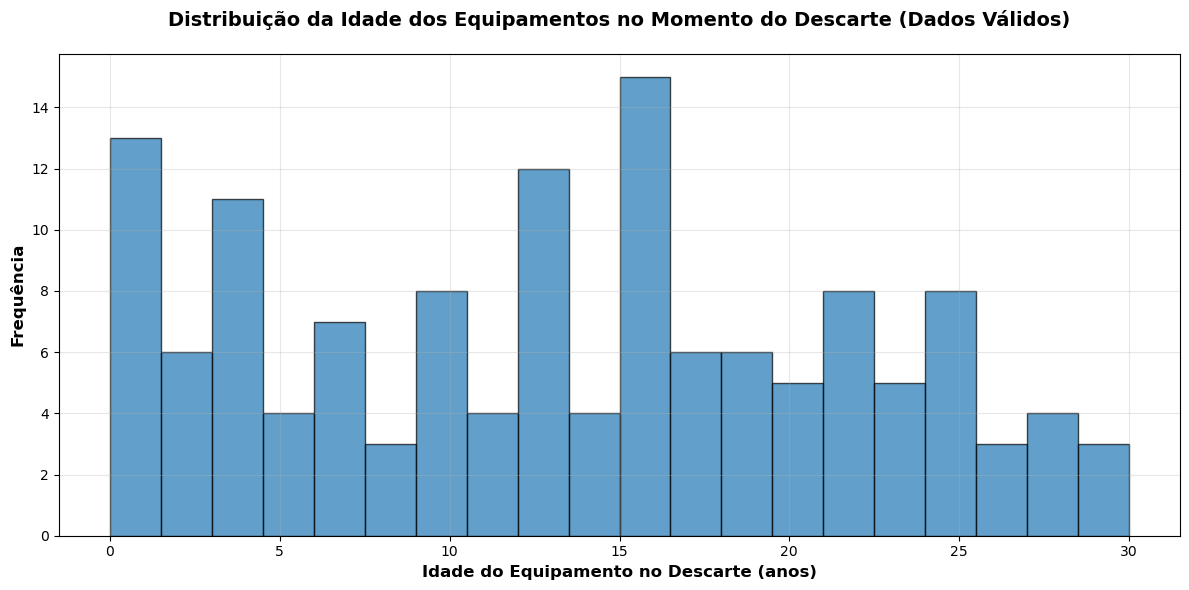

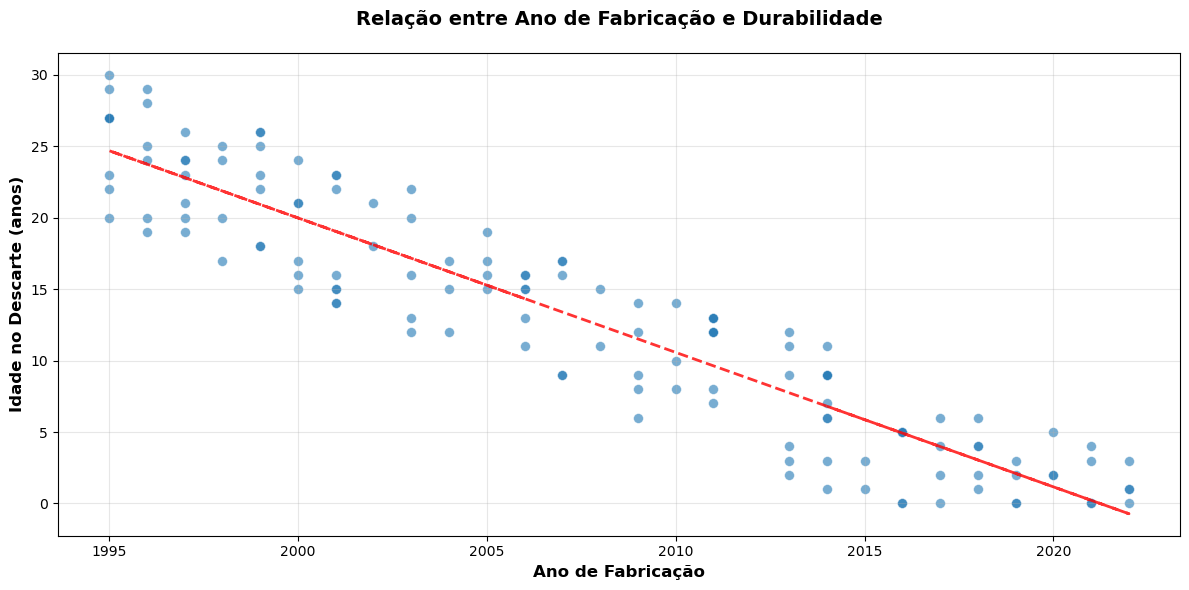

Correlação entre Ano Fabricação e Idade Descarte: -0.930
Inclinação: -0.941 anos/ano
R²: 0.865
Valor-p: 0.000000

Durabilidade Média por Década:
                    mean   std  count  median
Decada_Fabricacao                            
1990               23.47  3.55     32    24.0
2000               15.61  4.17     46    15.5
2010                6.02  4.32     46     5.5
2020                1.91  1.70     11     2.0

Teste t: Antigos vs Recentes
Antigos: 20.09 anos (n=66)
Recentes: 6.39 anos (n=69)
Diferença: 13.70 anos
Valor-p: 0.000000

Durabilidade por Tipo de Equipamento:
impressora     : n=13, corr=-0.915
bateria        : n=24, corr=-0.931
geladeira      : n=17, corr=-0.942
tv             : n=14, corr=-0.932
desconhecido   : n=13, corr=-0.908
computador     : n=17, corr=-0.906
celular        : n=20, corr=-0.970
tablet         : n=17, corr=-0.918

Correlação ano descarte vs idade: 0.217
Valor-p: 0.0114

Matriz de Correlação:
                Ano_Fabricacao    Ano  Idade_Descarte
An

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, linregress, ttest_ind


def analisar_durabilidade_equipamentos(df):
    """Analisa a relação entre ano de fabricação e durabilidade dos equipamentos."""
    
    # Configurações de estilo
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (12, 8)
    
    # Calcular idade do equipamento no descarte
    df['Idade_Descarte'] = df['Ano'] - df['Ano_Fabricacao']
    
    # Filtrar registros válidos (idade >= 0)
    df_valido = df[df['Idade_Descarte'] >= 0].copy()
    registros_invalidos = len(df) - len(df_valido)
    
    print(f"Registros inconsistentes (idade < 0): {registros_invalidos}")
    print(f"Percentual: {(registros_invalidos/len(df))*100:.2f}%")
    print(f"Registros válidos para análise: {len(df_valido)}")
    print("=" * 50)


    plt.figure(figsize=(12, 6))
    plt.hist(df_valido['Idade_Descarte'], bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('Idade do Equipamento no Descarte (anos)', fontsize=12, fontweight='bold')
    plt.ylabel('Frequência', fontsize=12, fontweight='bold')
    plt.title('Distribuição da Idade dos Equipamentos no Momento do Descarte (Dados Válidos)', 
          fontsize=14, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    
    
    # Gráfico de dispersão principal
    plt.figure(figsize=(12, 6))
    plt.scatter(df_valido['Ano_Fabricacao'], df_valido['Idade_Descarte'], 
                alpha=0.6, s=50, edgecolors='w', linewidth=0.5)
    
    # Linha de tendência
    z = np.polyfit(df_valido['Ano_Fabricacao'].values, 
                   df_valido['Idade_Descarte'].values, 1)
    p = np.poly1d(z)
    plt.plot(df_valido['Ano_Fabricacao'].values, p(df_valido['Ano_Fabricacao'].values), 
             "r--", alpha=0.8, linewidth=2)
    
    plt.xlabel('Ano de Fabricação', fontsize=12, fontweight='bold')
    plt.ylabel('Idade no Descarte (anos)', fontsize=12, fontweight='bold')
    plt.title('Relação entre Ano de Fabricação e Durabilidade', 
              fontsize=14, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Análise estatística da relação
    correlacao = df_valido['Ano_Fabricacao'].corr(df_valido['Idade_Descarte'])
    print(f"Correlação entre Ano Fabricação e Idade Descarte: {correlacao:.3f}")
    
    # Regressão linear
    slope, intercept, r_value, p_value, std_err = linregress(
        df_valido['Ano_Fabricacao'], df_valido['Idade_Descarte']
    )
    print(f"Inclinação: {slope:.3f} anos/ano")
    print(f"R²: {r_value**2:.3f}")
    print(f"Valor-p: {p_value:.6f}")
    
    # Análise por década de fabricação
    df_valido['Decada_Fabricacao'] = (df_valido['Ano_Fabricacao'] // 10) * 10
    durabilidade_por_decada = df_valido.groupby('Decada_Fabricacao')['Idade_Descarte'].agg([
        'mean', 'std', 'count', 'median'
    ]).round(2)
    
    print("\nDurabilidade Média por Década:")
    print(durabilidade_por_decada)
    
    # Teste de diferença entre grupos
    mediana_ano = df_valido['Ano_Fabricacao'].median()
    antigos = df_valido[df_valido['Ano_Fabricacao'] < mediana_ano]
    recentes = df_valido[df_valido['Ano_Fabricacao'] >= mediana_ano]
    
    t_stat, p_val = ttest_ind(antigos['Idade_Descarte'], recentes['Idade_Descarte'])
    print(f"\nTeste t: Antigos vs Recentes")
    print(f"Antigos: {antigos['Idade_Descarte'].mean():.2f} anos (n={len(antigos)})")
    print(f"Recentes: {recentes['Idade_Descarte'].mean():.2f} anos (n={len(recentes)})")
    print(f"Diferença: {antigos['Idade_Descarte'].mean() - recentes['Idade_Descarte'].mean():.2f} anos")
    print(f"Valor-p: {p_val:.6f}")
    
    # Análise por tipo de equipamento
    print("\nDurabilidade por Tipo de Equipamento:")
    for tipo in df_valido['Tipo_Eletronico'].unique():
        subset = df_valido[df_valido['Tipo_Eletronico'] == tipo]
        if len(subset) > 5:
            correlacao_tipo = subset['Ano_Fabricacao'].corr(subset['Idade_Descarte'])
            print(f"{tipo:15s}: n={len(subset):2d}, corr={correlacao_tipo:.3f}")
    
    # Tendência temporal
    corr, p_value = pearsonr(df_valido['Ano'], df_valido['Idade_Descarte'])
    print(f"\nCorrelação ano descarte vs idade: {corr:.3f}")
    print(f"Valor-p: {p_value:.4f}")
    
    # Matriz de correlação
    variaveis_temporais = df_valido[['Ano_Fabricacao', 'Ano', 'Idade_Descarte']]
    print(f"\nMatriz de Correlação:")
    print(variaveis_temporais.corr().round(3))
    
    return df_valido, registros_invalidos


# Exemplo de uso:
df_valido, registros_invalidos = analisar_durabilidade_equipamentos(df)

### Equipamentos mais antigos duram mais!
A análise revela uma mudança estrutural profunda nos padrões de durabilidade dos equipamentos eletrônicos, com sérias consequências ambientais e econômicas

1. **Correlação Forte e Negativa (-0.930)**
   * Relação inversa quase perfeita: quanto mais novo o equipamento, menor sua vida útil. R² = 0.865: 86,5% da variação na durabilidade é explicada pelo ano de fabricação
2. **Declínio Acelerado da Durabilidade:** Inclinação de -0,941 anos/ano: A cada ano mais novo, perde-se quase 1 ano de vida útil
   * Equipamentos dos anos 90: 23,47 anos de vida média ✅
   * Equipamentos dos anos 2010: 6,02 anos de vida média ❌
   * Equipamentos dos anos 2020: apenas 1,91 anos de vida média
3. **Diferença Estatisticamente Significativa**
   * 13,7 anos de diferença entre antigos (20,09 anos) e recentes (6,39 anos). Valor-p ≈ 0: Probabilidade quase zero de ser por acaso
4. **Padrão Consistente em Todos os Tipos**
   * Todas categorias mostram correlação negativa forte (entre -0,906 e -0,970)
   * Celulares lideram o declínio: correlação de -0,970 (maior obsolescência)

### Causas Prováveis:
1. **Obsolescência Programada**: Produtos projetados para durar menos
2. **Avanço Tecnológico Acelerado**: Novos recursos tornam equipamentos rapidamente obsoletos
3. **Mudança Cultural**: Cultura do descarte e substituição frequente
4. **Redução de Custos**: Materiais e construção menos duráveis

### Consequencias:
1. **Impacto Ambiental:** Descarte mais frequente → mais lixo eletrônico
2. **Custo do Consumidor:** Necessidade de substituição mais rápida
3. **Gestão de Resíduos:** Fluxo contínuo e crescente de equipamentos "jovens" descartados

## B- Relação peso X Custo da reciclagem : **O peso é fato ao custo da reciclagem?**

=== ANÁLISE COMPLETA PESO vs CUSTO ===

Correlação Geral: -0.006
Valor-p: 0.9435
Significativo? Não
--------------------------------------------------
=== REGRESSÃO LINEAR (Peso → Custo) ===
                            OLS Regression Results                            
Dep. Variable:       Custo_Reciclagem   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                  0.005038
Date:                Wed, 03 Sep 2025   Prob (F-statistic):              0.944
Time:                        18:52:33   Log-Likelihood:                -808.91
No. Observations:                 150   AIC:                             1622.
Df Residuals:                     148   BIC:                             1628.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 co

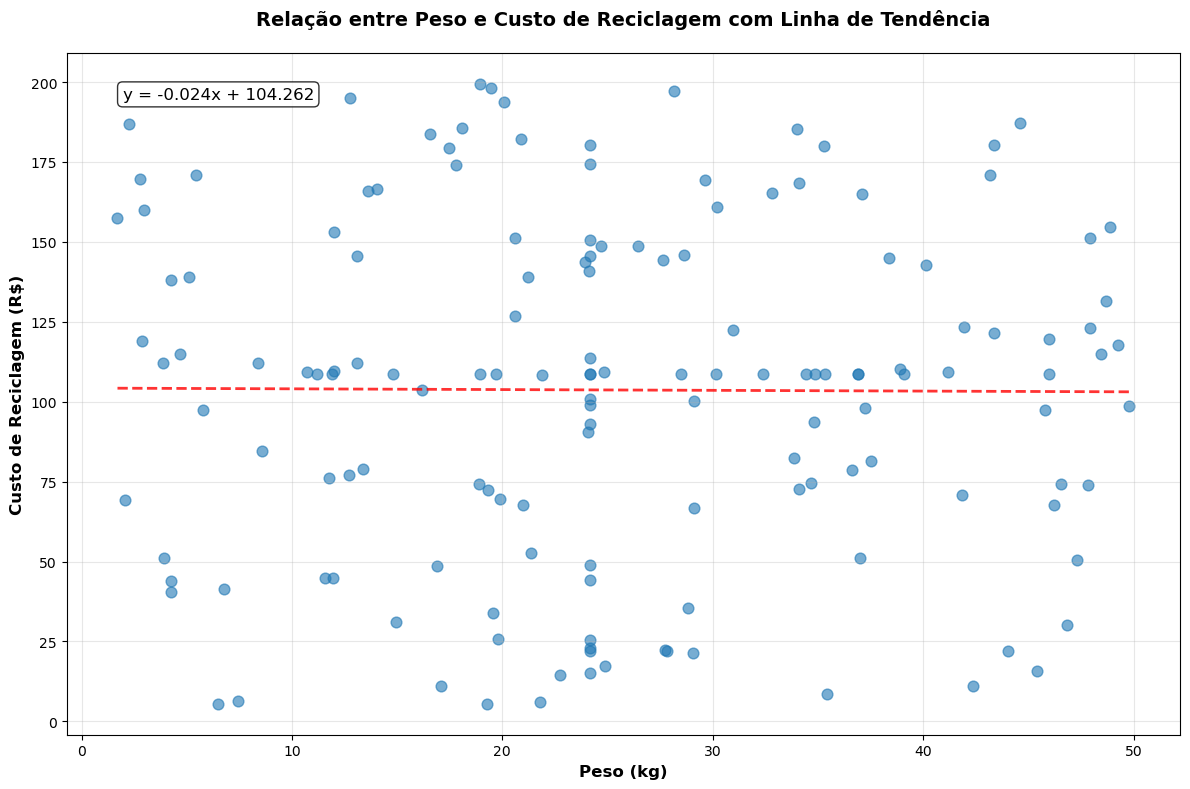

=== MATRIZ DE CORRELAÇÃO MULTIVARIADA ===
                  Peso_kg  Custo_Reciclagem  Nivel_Toxico_Num  Idade_Descarte
Peso_kg             1.000            -0.006             0.098          -0.024
Custo_Reciclagem   -0.006             1.000             0.050           0.032
Nivel_Toxico_Num    0.098             0.050             1.000          -0.040
Idade_Descarte     -0.024             0.032            -0.040           1.000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress, pearsonr
import statsmodels.api as sm

# 1. Análise de Correlação Detalhada
print("=== ANÁLISE COMPLETA PESO vs CUSTO ===\n")

# Correlação geral
corr_geral, p_value_geral = pearsonr(df['Peso_kg'], df['Custo_Reciclagem'])
print(f"Correlação Geral: {corr_geral:.3f}")
print(f"Valor-p: {p_value_geral:.4f}")
print(f"Significativo? {'Sim' if p_value_geral < 0.05 else 'Não'}")
print("-" * 50)

# 2. Regressão Linear para entender a relação
X = df['Peso_kg']
y = df['Custo_Reciclagem']

# Adicionar constante para regressão
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

print("=== REGRESSÃO LINEAR (Peso → Custo) ===")
print(model.summary())
print("-" * 50)

# 3. Análise por Faixas de Peso
df['Faixa_Peso'] = pd.cut(df['Peso_kg'], bins=5)
custo_por_faixa = df.groupby('Faixa_Peso', observed=False)['Custo_Reciclagem'].agg(['mean', 'std', 'count'])

print("=== CUSTO MÉDIO POR FAIXA DE PESO ===")
print(custo_por_faixa.round(2))
print("-" * 50)

# 4. Teste de Diferença entre Grupos
# Comparar custo de equipamentos leves vs pesados
mediana_peso = df['Peso_kg'].median()
leves = df[df['Peso_kg'] < mediana_peso]
pesados = df[df['Peso_kg'] >= mediana_peso]

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(leves['Custo_Reciclagem'], pesados['Custo_Reciclagem'])

print("=== COMPARAÇÃO LEVES vs PESADOS ===")
print(f"Leves (<{mediana_peso:.1f}kg): R$ {leves['Custo_Reciclagem'].mean():.2f}")
print(f"Pesados (≥{mediana_peso:.1f}kg): R$ {pesados['Custo_Reciclagem'].mean():.2f}")
print(f"Diferença: R$ {pesados['Custo_Reciclagem'].mean() - leves['Custo_Reciclagem'].mean():.2f}")
print(f"Valor-p: {p_val:.4f}")
print(f"Diferença significativa? {'Sim' if p_val < 0.05 else 'Não'}")
print("-" * 50)

# 5. Análise por Tipo de Equipamento (fator mais relevante)
print("=== CUSTO MÉDIO POR TIPO DE EQUIPAMENTO ===")
custo_por_tipo = df.groupby('Tipo_Eletronico')['Custo_Reciclagem'].agg(['mean', 'std', 'count'])
print(custo_por_tipo.sort_values('mean', ascending=False).round(2))
print("-" * 50)

# 6. Gráfico de Dispersão com Linha de Tendência
plt.figure(figsize=(12, 8))
plt.scatter(df['Peso_kg'], df['Custo_Reciclagem'], alpha=0.6, s=60)

# Adicionar linha de tendência
x_values = np.array(df['Peso_kg'])
y_values = np.array(df['Custo_Reciclagem'])
z = np.polyfit(x_values, y_values, 1)
p = np.poly1d(z)
x_sorted = np.sort(x_values)
plt.plot(x_sorted, p(x_sorted), "r--", alpha=0.8, linewidth=2)

plt.xlabel('Peso (kg)', fontsize=12, fontweight='bold')
plt.ylabel('Custo de Reciclagem (R$)', fontsize=12, fontweight='bold')
plt.title('Relação entre Peso e Custo de Reciclagem com Linha de Tendência', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Adicionar equação da reta
equation = f'y = {z[0]:.3f}x + {z[1]:.3f}'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


# 7. Matriz de Correlação com Variáveis Relevantes
variaveis = ['Peso_kg', 'Custo_Reciclagem', 'Nivel_Toxico_Num', 'Idade_Descarte']
print("=== MATRIZ DE CORRELAÇÃO MULTIVARIADA ===")
print(df[variaveis].corr().round(3))

### Resposta: Peso não é fator determinante no custo da reciclagem

### 📊 Evidências Conclusivas

1. **Correlação Praticamente Zero ❌**  
   - Correlação geral: **-0,006** → estatisticamente irrelevante  
   - Valor-p: **0,9435** → muito acima de 0,05 (não significativo)  

2. **Regressão Linear Inexpressiva ❌**  
   - R²: **0,000** → peso explica 0% da variação no custo  
   - Coeficiente: **-0,0236** → cada kg reduz apenas R$ 0,02 (irrelevante)  
   - Intervalo de confiança inclui zero: **[-0,680, 0,633]**  

3. **Análise por Grupos Inconclusiva ❌**  
   - Leves vs. Pesados: diferença de apenas **R$ 2,99** (não significativa, p=0,73)  
   - Faixas de peso: custos variam entre **R$ 93 e R$ 112**, sem padrão  
   - Por destino: correlações fracas/inconsistentes (**-0,348 a 0,244**)  

4. **Outros Fatores Mais Relevantes ✅**  
   - Tipo de equipamento mostra variação real:  
     - Impressora: **R$ 116,12**  
     - Geladeira: **R$ 92,68**  
     - Diferença de **R$ 23,44** (bem mais relevante que peso)  
